# Predicting Prisoner Recidivism in Iowa
- Identifying Risk Factors with Machine Learning

<img src="images/iowa_in_jail.png" width=400px>

### Final Project Submission
* Student name: James M. Irivng, Ph.D.
* Student pace: full time
* Scheduled project review date/time: 05/15/19 2:30 pm
* Instructor name: Jeff Herman / Brandon Lewis


# Iowa Prisoner Recidivism

## Business problem

<img src="images/LSA_map_with_counties_districts_and_B54A5BBCE4156.jpg" width=300px>

- The state of Iowa has had a prisoner recidivism issue that has become an increasing problem over several decades, with recidivism rates over 35% in 2007-2009.  While there was a period of gradual reduction from 2010-2014, there was a major jump in recidivism in 2015-2016.
<img src="images/recidivism_report_1.png" width=400px>

- In 2015, US Dept. of Justice gave Iowa a $3 million Grant to help reduce recividism. At the time, 31.9% of  all released prisoners from Iowa were returning to prison within 3 years of being released.
Despite this investment, the recidivism rate has continued to clime, reaching 36% by 2018.


<img src="images/recidivism_report_2.png" width=400px>

- *Recidivism statistics and visualizations above are from the [Iowa Department of Corrections Annual Report 2018](https://doc.iowa.gov/document/fy-2018-corrections-annual-report)*



- In order the better address the increase in prisoner recidivism, the Iowa State Department of Corrections has released data regarding which prisoners return to jail within 3 years of release, in the hopes of finding insights for areas of possible intervention.







### Project Goal

- Our goal for this analysis was two-fold: 
    1. Build a machine learning model that could predict which released prisoners will become recidivists/return-to-prison within 3 years of release.
    2. To identify which of the prisoner's demographics/features best predicts/explains which prisoners become recidivists.

## Data Source: Iowa Department of Corrections 

- Source: 
    - https://www.kaggle.com/slonnadube/recidivism-for-offenders-released-from-prison
- Original/Up-to-date Source: 
    - https://data.iowa.gov/Correctional-System/3-Year-Recidivism-for-Offenders-Released-from-Pris/mw8r-vqy4
- **Statistics about recidivism in prisoners from a 3 year prisoner**

#### **Target:**
- Recidivism - Return to Prison
    - No = No Recidivism; 
    - Yes = Prison admission for any reason within the 3-year tracking period

#### **Features:**
<!--     - Fiscal Year Released
    - Recidivism Reporting Year
    - Race - Ethnicity
    - Age At Release
    - Convicting Offense Classification
    - Convicting Offense Type
    - Convicting Offense Subtype
    - Main Supervising District
    - Release Type
    - Release type: Paroled to Detainder united
    - Part of Target Population -->

- ~~**Fiscal Year Released**~~ [Not used in model]
    - Fiscal year (year ending June 30) for which the offender was released from prison.

- ~~**Recidivism Reporting Year**~~ [Not used in model]
    - Fiscal year (year ending June 30) that marks the end of the 3-year tracking period. For example, offenders exited prison in FY 2012 are found in recidivism reporting year FY 2015.

- **Race - Ethnicity**
    - Offender's Race and Ethnicity

- **Convicting Offense Classification**
    - Maximum penalties: A Felony = Life; B Felony = 25 or 50 years; C Felony = 10 years; D Felony = 5 years; Aggravated Misdemeanor = 2 years; Serious Misdemeanor = 1 year; Simple Misdemeanor = 30 days

- **Convicting Offense Type**
    - General category for the most serious offense for which the offender was placed in prison.

- **Convicting Offense Subtype**
    - Further classification of the most serious offense for which the offender was placed in prison.

- **Release Type**
    - Reasoning for Offender's release from prison.

- **Main Supervising District**
    - The Judicial District supervising the offender for the longest time during the tracking period.


- **Part of Target Population** 
    - The Department of Corrections has undertaken specific strategies to reduce recidivism rates for prisoners who are on parole and are part of the target population.


# USING THE OSEMN MODEL TO GUIDE WORKFLOW

1. **OBTAIN:**
    - [x] Import data, inspect, check for datatypes to convert and null values
<br><br>

2. **SCRUB: cast data types, identify outliers, check for multicollinearity, normalize data**<br>
    - Check and cast data types
    - [x] Check for missing values 
    - [x] Check for multicollinearity
    - [x] Normalize data (may want to do after some exploring)   
    <br><br>
            
3. **EXPLORE:Check distributions, outliers, etc**
    - [x] Check scales, ranges (df.describe())
    - [x] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform
    - [x] Use scatterplots to check for linearity and possible categorical variables (df.plot(kind-'scatter')
    <br><br>

   
4. **FIT AN INITIAL MODEL:** 
    - [x] Assess the model.
        <br><br>
5. **REVISE THE FITTED MODEL**
    - [x] Adjust chosen model and hyper-parameters
    <br><br>
6. **HOLDOUT VALIDATION**
    - [ ] Perform cross-validation
___

# OBTAIN:

In [1]:
## Reducing Random Variations
import numpy as np
SEED = 321
SMOTE_SEED = 432
np.random.seed(SEED)

#### Using Custom PyPi Package - `fsds`


In [2]:
# !pip install -U fsds
from fsds.imports import *

fsds v0.3.2 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [3]:
%load_ext autoreload
%autoreload 2
import bs_ds_local as bs
import project_functions as ji

In [4]:
## Set Pandas Options
import pandas as pd
# pd.set_eng_float_format(accuracy=2)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
pd_options = {
    'display.max_rows'    : 200,
    'display.max_info_rows':200,
    'display.max_columns' : 0,
}
[pd.set_option(option, setting) for option, setting in pd_options.items()]

## Visualization Packages and Settings
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# !pip isntall missingno
import missingno as ms

# %conda install -c conda-forge shap
import shap
shap.initjs()

## Set Plot Style
plt.style.use('seaborn-notebook')
# sns.set_context(font_scale=2)

## Suppress Warnings
# import warnings
# warnings.filterwarnings('ignore')


## version check
import sklearn
import xgboost as xgb

print(f"Matplotlib Version: {mpl.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Numpy Version: {np.__version__}")
print(f"Seaborn Version: {sns.__version__}")
print(f"Scikit-learn Version: {sklearn.__version__}")
print(f"XGBoost Version: {xgb.__version__}")
print(f"Shap Version: {shap.__version__}")

Matplotlib Version: 3.3.1
Pandas Version: 1.3.0
Numpy Version: 1.19.5
Seaborn Version: 0.11.0
Scikit-learn Version: 0.23.2
XGBoost Version: 1.3.3
Shap Version: 0.37.0


In [134]:
## Preprocessing & Modeling Imports
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (StandardScaler, MinMaxScaler,RobustScaler,
                                   OneHotEncoder)
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.svm import LinearSVC,SVC

import joblib,os
from sklearn.base import clone
from sklearn import set_config
set_config(display='diagram')

##  PROJECT CONTROL BOOLEAN ARGS

In [6]:
### PROJECT CONTROL BOOLS

## 1. Data Source
# Control if data downloaded fresh from Iowa gov api or original kaggle versin
USE_ORIG_DATA = False 

## if USE_ORIG_DATA==False, download new csv from API or use previous downloaded
GET_NEW_DATA = False

if USE_ORIG_DATA==True &  GET_NEW_DATA==True:
    raise Exception('Only one of [USE_ORIG_DATA, GET_NEW_DATA] may be True')

## 2. Gridsearches
# Control if run new gridsearch or use previous params
RUN_SEARCHES = True


## Loading the dataset and removing unrelated columns

In [7]:
## Set project booleans above to change data source used
if USE_ORIG_DATA:
    file = 'data/3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv'
    print(f'Using original data: {file}')
    df = pd.read_csv(file)
    
    ## Making snake case column names if using orignal Kaggle dataset
    snake_case_cols = [c.lower().strip().replace(' - ',' ').replace(' ','_') for c in df.columns]

    ## clean up additional changes made to col names
    list_of_updates = [('classification','class'),
                       ('days_to_return','days_return'),
                      ('sub_type','subtype')]
    ## Fix changes in naming scheme
    for current,new in list_of_updates:
        snake_case_cols =[c.replace(current,new) for c in snake_case_cols]
    
    ## Make a renaming map and rename columns
    column_names_map = dict(zip(df.columns,snake_case_cols))
    df.rename(column_names_map,axis=1,inplace=True)
    
elif GET_NEW_DATA:
    url = "https://data.iowa.gov/resource/mw8r-vqy4.csv"
    print(f'Downloading data from API: {url}')
    df = pd.read_csv(url)
    
    new_file = "data/iowa-prisoner-recidivism_data-iowa-gov-api.csv"
    df.to_csv(new_file,index=False)
    print(f"- downloaded data saved as: {new_file}")

else:
    file = "data/iowa-prisoner-recidivism_data-iowa-gov-api.csv"
    df = pd.read_csv(file)
    print(f'Using preivous api download: {file}' )

df.head()

Using preivous api download: data/iowa-prisoner-recidivism_data-iowa-gov-api.csv


,fiscal_year_released,recidivism_reporting_year,main_supervising_district,release_type,race_ethnicity,age_at_release,sex,offense_class,offense_type,offense_subtype,return_to_prison,days_return,recidivism_type,new_offense_class,new_offense_type,new_offense_subtype,target_population
0,2010,2013,7JD,Parole,Black - Non-Hispanic,25-34,Male,C Felony,Violent,Robbery,Yes,433.00,New,C Felony,Drug,Trafficking,Yes
1,2010,2013,NaN,Discharged – End of Sentence,White - Non-Hispanic,25-34,Male,D Felony,Property,Theft,Yes,453.00,Tech,NaN,NaN,NaN,No
2,2010,2013,5JD,Parole,White - Non-Hispanic,35-44,Male,B Felony,Drug,Trafficking,Yes,832.00,Tech,NaN,NaN,NaN,Yes
3,2010,2013,6JD,Parole,White - Non-Hispanic,25-34,Male,B Felony,Other,Other Criminal,No,NaN,No Recidivism,NaN,NaN,NaN,Yes
4,2010,2013,NaN,Discharged – End of Sentence,Black - Non-Hispanic,35-44,Male,D Felony,Violent,Assault,Yes,116.00,Tech,NaN,NaN,NaN,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   fiscal_year_released       int64  
 1   recidivism_reporting_year  int64  
 2   main_supervising_district  object 
 3   release_type               object 
 4   race_ethnicity             object 
 5   age_at_release             object 
 6   sex                        object 
 7   offense_class              object 
 8   offense_type               object 
 9   offense_subtype            object 
 10  return_to_prison           object 
 11  days_return                float64
 12  recidivism_type            object 
 13  new_offense_class          object 
 14  new_offense_type           object 
 15  new_offense_subtype        object 
 16  target_population          object 
dtypes: float64(1), int64(2), object(14)
memory usage: 132.9+ KB


In [9]:
## Check years included 
df[[c for c in df.columns if 'year' in c]].agg(['min','max'])

,fiscal_year_released,recidivism_reporting_year
min,2010,2013
max,2014,2017


### FEATURE ENGINEERING TO-DO:

- I would like to add more information related to the judicial district. 
- One approach is to match the Judicial Districts to Counties and map crime/pop data for the county to the district.
- List of Counties Served on Ballotpedia:
    - https://ballotpedia.org/Iowa_District_Courts
- FBI Crime report for 2014:
    - https://ucr.fbi.gov/crime-in-the-u.s/2014/preliminary-semiannual-uniform-crime-report-january-june-2014

**Any columns that are about New Convictions or days to recidivism should be dropped for our initial model predicting recidivism.**
- "New..", "Days to Recividism"

In [10]:
## Drop cols related to recivism details 
drop_expr = ['new',"days","recidivism_type","year"]
drop_cols = []
for exp in drop_expr:
    drop_cols.extend([col for col in df.columns if exp in col])
drop_cols

['new_offense_class',
 'new_offense_type',
 'new_offense_subtype',
 'days_return',
 'recidivism_type',
 'fiscal_year_released',
 'recidivism_reporting_year']

In [11]:
## Saving removed columns to merge again after feature engineering (for tableau)
removed_df = df[drop_cols].copy()
removed_df

,new_offense_class,new_offense_type,new_offense_subtype,days_return,recidivism_type,fiscal_year_released,recidivism_reporting_year
0,C Felony,Drug,Trafficking,433.00,New,2010,2013
1,NaN,NaN,NaN,453.00,Tech,2010,2013
2,NaN,NaN,NaN,832.00,Tech,2010,2013
3,NaN,NaN,NaN,NaN,No Recidivism,2010,2013
4,NaN,NaN,NaN,116.00,Tech,2010,2013
...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,No Recidivism,2010,2013
996,NaN,NaN,NaN,NaN,No Recidivism,2010,2013
997,NaN,NaN,NaN,NaN,No Recidivism,2010,2013
998,NaN,NaN,NaN,NaN,No Recidivism,2010,2013


In [12]:
df.drop(columns=drop_cols,inplace=True)
df.head()

,main_supervising_district,release_type,race_ethnicity,age_at_release,sex,offense_class,offense_type,offense_subtype,return_to_prison,target_population
0,7JD,Parole,Black - Non-Hispanic,25-34,Male,C Felony,Violent,Robbery,Yes,Yes
1,NaN,Discharged – End of Sentence,White - Non-Hispanic,25-34,Male,D Felony,Property,Theft,Yes,No
2,5JD,Parole,White - Non-Hispanic,35-44,Male,B Felony,Drug,Trafficking,Yes,Yes
3,6JD,Parole,White - Non-Hispanic,25-34,Male,B Felony,Other,Other Criminal,No,Yes
4,NaN,Discharged – End of Sentence,Black - Non-Hispanic,35-44,Male,D Felony,Violent,Assault,Yes,No


### Save original names vs short names in column_legend
- then map names onto columns

In [13]:
# ## Replacing columns with short names
# rename_map = {
#     'Fiscal Year Released': 'yr_released',
#     'Recidivism Reporting Year': 'report_year' ,
#     'Main Supervising District': 'supervising_dist' ,
#     'Release Type': 'release_type' ,
#     'Race - Ethnicity': 'race_ethnicity'  ,
#     'Age At Release ':  'age_at_release' ,
#     'Sex':'sex'   ,
#     'Offense Classification': 'offense_class' ,
#     'Offense Type': 'crime_type'  ,
#     'Offense Subtype':  'crime_subtype' ,
#     'Return to Prison': 'recidivist'  ,
#     'Target Population':  'target_pop'
# }

# df = df.rename(rename_map,axis=1)
# df

In [14]:
df.to_csv('data/iowa_recidivism_renamed_2021.csv')

# SCRUB / EXPLORE


In [15]:
## Explore Dtypes and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   main_supervising_district  object
 1   release_type               object
 2   race_ethnicity             object
 3   age_at_release             object
 4   sex                        object
 5   offense_class              object
 6   offense_type               object
 7   offense_subtype            object
 8   return_to_prison           object
 9   target_population          object
dtypes: object(10)
memory usage: 78.2+ KB


In [16]:
import missingno as ms

def column_report(df,perc_null_thresh=5,return_report=False):
    """Returns a dataframe with the following summary information
    for each column in df.
    - Dtype
    - # Unique Entries
    - # Null Values
    - # Non-Null Values
    - % Null Values
    """
    report = pd.DataFrame({
        'nunique':df.nunique(),
        'dtype':df.dtypes, 
        '# Non-Null': df.notnull().sum(),
        '# Nulls': df.isna().sum(),
        '% Nulls':df.isna().sum()/len(df)*100,
        })
    
    report = report.reset_index().rename({'index':'column'},axis=1)
    
    if return_report:
        return report#.round(2)    
    else:
        def style_nulls(v, thresh=perc_null_thresh, props=''):
            return props if v > thresh else None
        s2 = report.style.applymap(style_nulls, props='color:red;',subset=['% Nulls'])\
                        .format(lambda x: f"{x:.2f} %",subset=['% Nulls'])\
                        .set_caption("Column Report")
        display(s2)
    



def nulls_report(df,plot=True):
    """Displays a series of null values for any columns with >0 nulls"""
    nulls= df.isna().sum()
    nulls_only = nulls[nulls>0]
    nulls_only = nulls_only.round(2)
    
    
    if plot:
        with plt.style.context('seaborn-poster'):
            ms.matrix(df,figsize=(10,4))
            plt.show()
        
    print('Columns with Null Values:')
    display(nulls_only)#.style.format(lambda x: f"{x:.2f} %",
#                                                       subset=['%']))

  

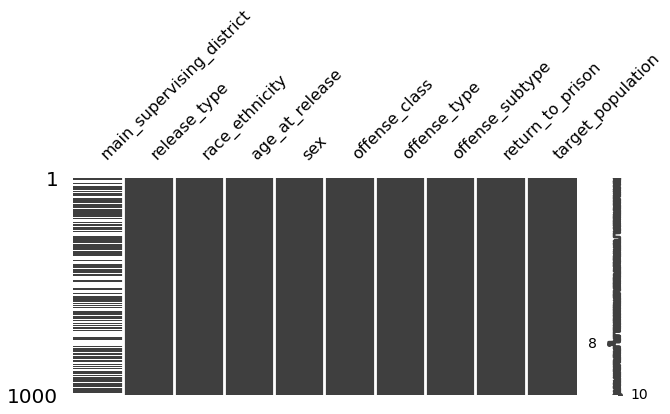

Columns with Null Values:


main_supervising_district    447
release_type                   2
dtype: int64

In [17]:
nulls_report(df)

**Results of Null Check**
<!-- - race_ethnicity has 30 (0.12% of data)
    -  drop
- age_at_release has 3 (0.01% of data)
    - drop
- sex has 3 (0.01% of data)
    - drop -->
- main_supervising_district has 9581(36.82% of data)
    - replace with "unknown"
- release_type has 1762 (6.77% of data)
    - drop
    
**Dropping all null values from age_at_release, race_ethnicity, and release_type.**

In [18]:
    
column_report(df)

,column,nunique,dtype,# Non-Null,# Nulls,% Nulls
0,main_supervising_district,8,object,553,447,44.70 %
1,release_type,3,object,998,2,0.20 %
2,race_ethnicity,8,object,1000,0,0.00 %
3,age_at_release,5,object,1000,0,0.00 %
4,sex,2,object,1000,0,0.00 %
5,offense_class,8,object,1000,0,0.00 %
6,offense_type,5,object,1000,0,0.00 %
7,offense_subtype,24,object,1000,0,0.00 %
8,return_to_prison,2,object,1000,0,0.00 %
9,target_population,2,object,1000,0,0.00 %


In [19]:
def value_counts(col,dropna=False,normalize=True,sort_index=False,rename=True):
    """Convenience function for display value counts with default params"""
    counts =  col.value_counts(dropna=dropna,normalize=normalize)
    if sort_index:
        counts.sort_index(inplace=True)
        
    if rename:
        counts.name=f'{counts.name}.value_counts(normalized={normalize}, dropna={dropna})'
    return counts

In [20]:
## inspect categories
dashes = '---'*20
for col in df.columns:
    print(dashes)
    print(f"Value Counts for {col}:")
    display(value_counts(df[col],normalize=False,rename=False))
    print()

------------------------------------------------------------
Value Counts for main_supervising_district:


NaN    447
5JD    146
1JD     90
2JD     73
8JD     68
7JD     59
3JD     41
6JD     38
4JD     38
Name: main_supervising_district, dtype: int64


------------------------------------------------------------
Value Counts for release_type:


Parole                          539
Discharged – End of Sentence    445
Special Sentence                 14
NaN                               2
Name: release_type, dtype: int64


------------------------------------------------------------
Value Counts for race_ethnicity:


White - Non-Hispanic                               665
Black - Non-Hispanic                               232
White - Hispanic                                    80
American Indian or Alaska Native - Non-Hispanic     15
Asian or Pacific Islander - Non-Hispanic             5
American Indian or Alaska Native - Hispanic          1
White -                                              1
Black - Hispanic                                     1
Name: race_ethnicity, dtype: int64


------------------------------------------------------------
Value Counts for age_at_release:


25-34           342
35-44           250
45-54           187
Under 25        180
55 and Older     41
Name: age_at_release, dtype: int64


------------------------------------------------------------
Value Counts for sex:


Male      901
Female     99
Name: sex, dtype: int64


------------------------------------------------------------
Value Counts for offense_class:


D Felony                                 426
C Felony                                 273
Aggravated Misdemeanor                   158
Felony - Enhanced                         67
B Felony                                  66
Serious Misdemeanor                        7
Other Felony (Old Code)                    2
Sexual Predator Community Supervision      1
Name: offense_class, dtype: int64


------------------------------------------------------------
Value Counts for offense_type:


Drug            326
Property        316
Violent         223
Public Order    123
Other            12
Name: offense_type, dtype: int64


------------------------------------------------------------
Value Counts for offense_subtype:


Trafficking                        267
Theft                              140
Assault                            113
Burglary                            92
Sex                                 60
Forgery/Fraud                       59
OWI                                 52
Drug Possession                     33
Other Drug                          26
Traffic                             24
Other Violent                       21
Sex Offender Registry/Residency     21
Murder/Manslaughter                 18
Arson                               12
Vandalism                           12
Robbery                             11
Alcohol                             11
Weapons                              9
Other Criminal                       9
Flight/Escape                        5
Special Sentence Revocation          2
Kidnap                               1
Stolen Property                      1
Prostitution/Pimping                 1
Name: offense_subtype, dtype: int64


------------------------------------------------------------
Value Counts for return_to_prison:


No     710
Yes    290
Name: return_to_prison, dtype: int64


------------------------------------------------------------
Value Counts for target_population:


Yes    553
No     447
Name: target_population, dtype: int64

### Notes on Categorical Features

- convert age_at_release to numeric
- Convert return_to_prison and 'target_population' to 0,1

## SIMPLIFYING CATEGORICAL FEATURES

- Use Rare Label Encoding on high cardinality columns:
    - `offsense_subtype`
- Replace bins with numeric values:
    - `age_at_release`

In [21]:
# col = 'offense_subtype'
# ax = df[col].value_counts(1).plot(kind='bar',figsize=(8,4))
# ax.set(ylabel='% of Observations',xlabel='Category',
#        title=f'Value Counts for {col}')
# ax.axhline(.05,c='red',label='5% cutoff')
# ax.legend();

In [22]:
def plot_rare_labels(df,col = 'offense_subtype',
                     thresh=.01,report=True):
    
    ## PLot value counts
    counts = df[col].value_counts(1)
    
    ax = counts.plot(kind='bar',figsize=(8,4))
    ax.set(ylabel='% of Observations',xlabel='Category',
           title=f'Value Counts for {col}')
    ax.axhline(thresh,c='red',label=f'{thresh*100:.2f}% cutoff')
    ax.legend();
    
    ## get list of rare/non-rare
    rare = counts[counts<thresh]
    if report:
        plt.show()
        
        if len(rare)>0:
            print(f'[i] Rare Labels Present in {col}:')
            print(rare)
        else:
            print(f'[i] No Rare Labels Present in {col}.')
        

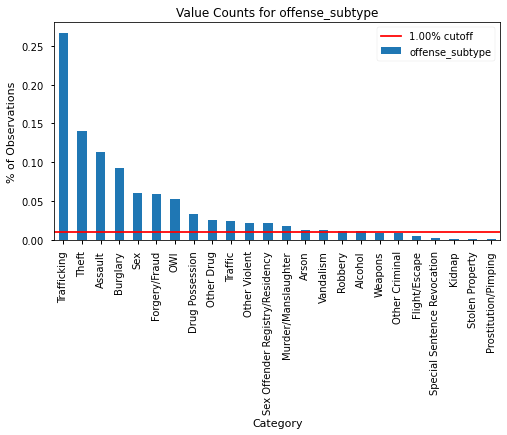

[i] Rare Labels Present in offense_subtype:
Weapons                       0.01
Other Criminal                0.01
Flight/Escape                 0.01
Special Sentence Revocation   0.00
Kidnap                        0.00
Stolen Property               0.00
Prostitution/Pimping          0.00
Name: offense_subtype, dtype: float64


In [23]:
plot_rare_labels(df,col='offense_subtype',thresh=0.01);

### Making `age_at_release` numerical

In [24]:
value_counts(df['age_at_release'])#.value_counts(dropna=False)

25-34          0.34
35-44          0.25
45-54          0.19
Under 25       0.18
55 and Older   0.04
Name: age_at_release.value_counts(normalized=True, dropna=False), dtype: float64

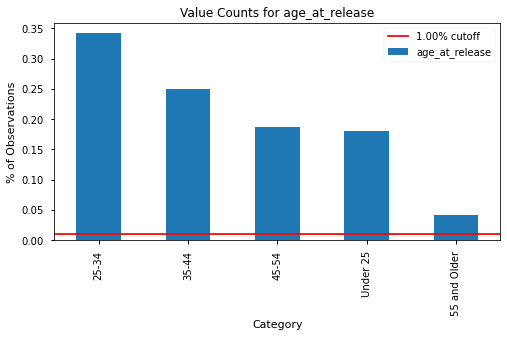

[i] No Rare Labels Present in age_at_release.


In [25]:
plot_rare_labels(df,'age_at_release')

In [26]:
# converting age to numeric feature
age_num_map = {'Under 25':20,
              '25-34':30, 
              '35-44':40,
              '45-54':50,
              '55 and Older':70}
df['age_at_release'] = df['age_at_release'].map(age_num_map)
value_counts(df['age_at_release'])

30   0.34
40   0.25
50   0.19
20   0.18
70   0.04
Name: age_at_release.value_counts(normalized=True, dropna=False), dtype: float64

### df['race_ethnicity']

In [27]:
value_counts(df['race_ethnicity'],normalize=False)

White - Non-Hispanic                               665
Black - Non-Hispanic                               232
White - Hispanic                                    80
American Indian or Alaska Native - Non-Hispanic     15
Asian or Pacific Islander - Non-Hispanic             5
American Indian or Alaska Native - Hispanic          1
White -                                              1
Black - Hispanic                                     1
Name: race_ethnicity.value_counts(normalized=False, dropna=False), dtype: int64

- **Remapping race_ethnicity**
    - Due to the low numbers for several of the race_ethnicity types, reducing and combining Hispanic and Non-Hispanic groups
    - Alternative approach of separating race and ethnicity into 2 separate features was rejected after modeling

In [28]:
# df['race_ethnicity'].unique()

In [29]:
# Defining Dictionary Map for race_ethnicity categories

# race_ethnicity_map = {'White - Non-Hispanic':'White',
#                         'Black - Non-Hispanic': 'Black',
#                         'White - Hispanic' : 'Hispanic',
#                         'American Indian or Alaska Native - Non-Hispanic' : 'American Native',
#                         'Asian or Pacific Islander - Non-Hispanic' : 'Asian or Pacific Islander',
#                         'Black - Hispanic' : 'Black',
#                         'American Indian or Alaska Native - Hispanic':'American Native',
#                         'White -' : 'White',
#                         'Asian or Pacific Islander - Hispanic' : 'Asian or Pacific Islander',
#                         'N/A -' : np.nan,
#                         'Black -':'Black'}

race_ethnicity_renamer = {'White -':'White - Non-Hispanic'}

# Replacing original race_ethnicity column with remapped one.
df['race_ethnicity'] = df['race_ethnicity'].replace(race_ethnicity_renamer)
value_counts(df['race_ethnicity'])

White - Non-Hispanic                              0.67
Black - Non-Hispanic                              0.23
White - Hispanic                                  0.08
American Indian or Alaska Native - Non-Hispanic   0.01
Asian or Pacific Islander - Non-Hispanic          0.01
American Indian or Alaska Native - Hispanic       0.00
Black - Hispanic                                  0.00
Name: race_ethnicity.value_counts(normalized=True, dropna=False), dtype: float64

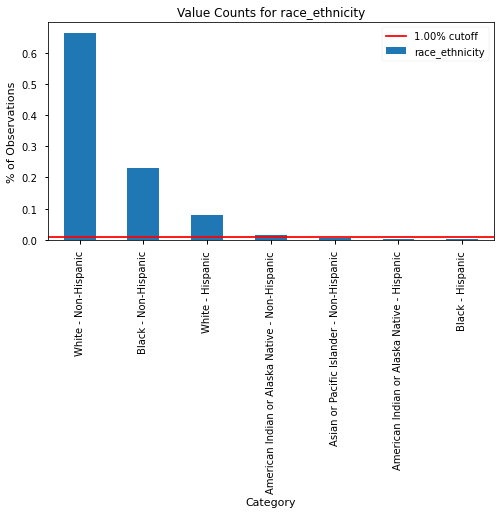

[i] Rare Labels Present in race_ethnicity:
Asian or Pacific Islander - Non-Hispanic      0.01
American Indian or Alaska Native - Hispanic   0.00
Black - Hispanic                              0.00
Name: race_ethnicity, dtype: float64


In [30]:
plot_rare_labels(df,'race_ethnicity')

### df['offense_class']

- **Remapping offense_class**
    - Combine 'Other Felony' and 'Other Felony (Old Code)' -> nan
    - Other Misdemeanor -> np.nan
    - Felony - Mandatory Minimum -> np.nan
    - Special Sentence 2005 -> Sex Offender
    - 'Sexual Predator Community Supervision' -> 'Sex Offender'
    - Other Felony -> np.nan    

In [31]:
value_counts(df['offense_class'])

D Felony                                0.43
C Felony                                0.27
Aggravated Misdemeanor                  0.16
Felony - Enhanced                       0.07
B Felony                                0.07
Serious Misdemeanor                     0.01
Other Felony (Old Code)                 0.00
Sexual Predator Community Supervision   0.00
Name: offense_class.value_counts(normalized=True, dropna=False), dtype: float64

In [32]:
# Remapping
offense_class_map = {'Other Felony (Old Code)':'Other Felony' ,#or other felony
                  'Other Misdemeanor':'Other Misdemeanor',
                   'Felony - Mandatory Minimum':'Other Felony',#np.nan, # if minimum then lowest sentence ==  D Felony
                   'Special Sentence 2005': 'Sex Offender',
                   'Other Felony' : 'Other Felony' ,
                   'Sexual Predator Community Supervision' : 'Sex Offender',
                   'D Felony': 'D Felony',
                   'C Felony' :'C Felony',
                   'B Felony' : 'B Felony',
                   'A Felony' : 'A Felony',
                   'Aggravated Misdemeanor':'Aggravated Misdemeanor',
                   'Felony - Enhancement to Original Penalty':'Felony - Enhanced',
                   'Felony - Enhanced':'Felony - Enhanced' ,
                   'Serious Misdemeanor':'Serious Misdemeanor',
                   'Simple Misdemeanor':'Simple Misdemeanor'}

df['offense_class'] = df['offense_class'].map(offense_class_map)
value_counts(df['offense_class'])

D Felony                 0.43
C Felony                 0.27
Aggravated Misdemeanor   0.16
Felony - Enhanced        0.07
B Felony                 0.07
Serious Misdemeanor      0.01
Other Felony             0.00
Sex Offender             0.00
Name: offense_class.value_counts(normalized=True, dropna=False), dtype: float64

In [33]:
# plot_rare_labels(df, 'offense_class')

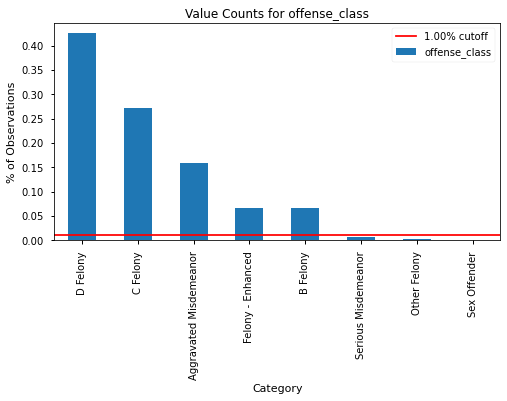

[i] Rare Labels Present in offense_class:
Serious Misdemeanor   0.01
Other Felony          0.00
Sex Offender          0.00
Name: offense_class, dtype: float64


In [34]:
plot_rare_labels(df,'offense_class')

## Remapping Binary Cols

In [35]:
binary_cols = df.columns[df.nunique()==2]
binary_cols

Index(['sex', 'return_to_prison', 'target_population'], dtype='object')

### 'sex'

In [36]:
sex_map = {'Male':1, 'Female':0}
sex_map

{'Male': 1, 'Female': 0}

In [37]:
df['sex'] = df['sex'].replace(sex_map)
df['sex'] = df['sex'].astype('category')
value_counts(df['sex'])

1   0.90
0   0.10
Name: sex.value_counts(normalized=True, dropna=False), dtype: float64

#### Remapping target

In [38]:
value_counts(df['return_to_prison'])

No    0.71
Yes   0.29
Name: return_to_prison.value_counts(normalized=True, dropna=False), dtype: float64

In [39]:
# # Recidivist
target_map = {'No':0,'Yes':1}
df['return_to_prison'] = df['return_to_prison'].map(target_map)
value_counts(df['return_to_prison'])

0   0.71
1   0.29
Name: return_to_prison.value_counts(normalized=True, dropna=False), dtype: float64

#### `target_pop`

In [40]:
value_counts(df['target_population'])

Yes   0.55
No    0.45
Name: target_population.value_counts(normalized=True, dropna=False), dtype: float64

In [41]:
df['target_population'] = df['target_population'].map( {'No':0,'Yes':1}).astype('category')
value_counts(df['target_population'])

1   0.55
0   0.45
Name: target_population.value_counts(normalized=True, dropna=False), dtype: float64

___
## FEATURE ENGINEERING
- **Engineering a simple 'felony' true false category**
- **Combining crime_type and crime_subtype into types_combined**

### Creating a simple 'felony' feature

In [42]:
# Engineering a simple 'felony' true false category
df['felony'] = df['offense_class'].str.contains('felony',case=False).astype('category')
value_counts(df['felony'])

True    0.83
False   0.17
Name: felony.value_counts(normalized=True, dropna=False), dtype: float64

In [43]:
df.dtypes

main_supervising_district      object
release_type                   object
race_ethnicity                 object
age_at_release                  int64
sex                          category
offense_class                  object
offense_type                   object
offense_subtype                object
return_to_prison                int64
target_population            category
felony                       category
dtype: object

In [44]:
df

,main_supervising_district,release_type,race_ethnicity,age_at_release,sex,offense_class,offense_type,offense_subtype,return_to_prison,target_population,felony
0,7JD,Parole,Black - Non-Hispanic,30,1,C Felony,Violent,Robbery,1,1,True
1,NaN,Discharged – End of Sentence,White - Non-Hispanic,30,1,D Felony,Property,Theft,1,0,True
2,5JD,Parole,White - Non-Hispanic,40,1,B Felony,Drug,Trafficking,1,1,True
3,6JD,Parole,White - Non-Hispanic,30,1,B Felony,Other,Other Criminal,0,1,True
4,NaN,Discharged – End of Sentence,Black - Non-Hispanic,40,1,D Felony,Violent,Assault,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,Discharged – End of Sentence,White - Hispanic,40,1,B Felony,Drug,Trafficking,0,0,True
996,NaN,Discharged – End of Sentence,White - Hispanic,40,1,B Felony,Drug,Trafficking,0,0,True
997,NaN,Discharged – End of Sentence,White - Hispanic,40,1,B Felony,Drug,Trafficking,0,0,True
998,7JD,Parole,Black - Non-Hispanic,40,1,D Felony,Public Order,Sex Offender Registry/Residency,0,1,True


In [45]:
# Combining crime_type and crime_subtype into types_combined
# df['offense_class_type_subtype']= df['offense_class']+'_'+df['offense_class']+'_'+df['offense_subtype']
# value_counts(df['offense_class_type_subtype'])
df.nunique()

main_supervising_district     8
release_type                  3
race_ethnicity                7
age_at_release                5
sex                           2
offense_class                 8
offense_type                  5
offense_subtype              24
return_to_prison              2
target_population             2
felony                        2
dtype: int64

### Creating a 'max_sentence' feature based on crime class max penalties
   

In [46]:
value_counts(df['offense_class']).sort_index()

Aggravated Misdemeanor   0.16
B Felony                 0.07
C Felony                 0.27
D Felony                 0.43
Felony - Enhanced        0.07
Other Felony             0.00
Serious Misdemeanor      0.01
Sex Offender             0.00
Name: offense_class.value_counts(normalized=True, dropna=False), dtype: float64

- Unsure what Other Felony might represent. Will assume its halfway between C and D penalty

In [47]:
# Mapping years onto crime class
offense_class_max_sentence_map = {'A Felony': 100,  # Life
                                'Aggravated Misdemeanor': 2, # 2 years
                                'B Felony': 25, # 25 or 50 years
                                'C Felony': 10, # 10 years
                                'D Felony': 5,  # 5 yeras
                                  'Other Felony': 7,
                                'Felony - Enhanced': 10, # Add on to class C and D felonies, hard to approximate. 
                                'Serious Misdemeanor': 1, # 1 year
                                'Sex Offender': 10, # 10 years
                                'Simple Misdemeanor': 30/365} # 30 days

# Mapping max_sentence_column
df['max_sentence'] =df['offense_class'].map(offense_class_max_sentence_map)
value_counts(df['max_sentence'])

5.00    0.43
10.00   0.34
2.00    0.16
25.00   0.07
1.00    0.01
7.00    0.00
Name: max_sentence.value_counts(normalized=True, dropna=False), dtype: float64

<AxesSubplot:xlabel='max_sentence', ylabel='Count'>

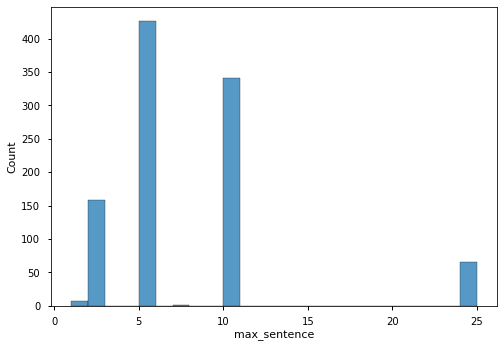

In [48]:
sns.histplot(df['max_sentence'])

### Final Null Check

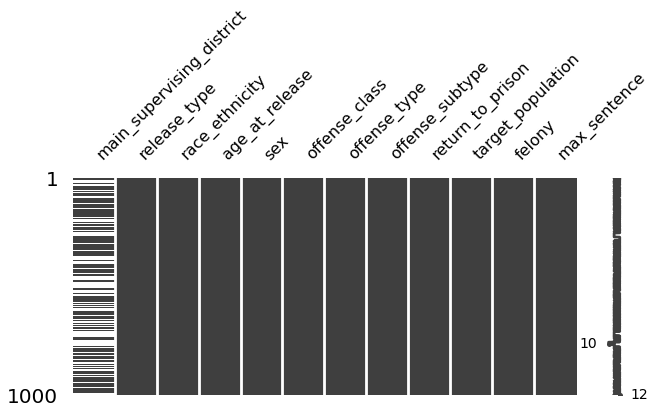

Columns with Null Values:


main_supervising_district    447
release_type                   2
dtype: int64

In [49]:
nulls_report(df)

# Preprocessing with  Pipelines and ColumnTransformer

In [50]:
# from sklearn.pipeline import Pipeline,make_pipeline
# from sklearn.compose import ColumnTransformer

# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import (StandardScaler, MinMaxScaler,RobustScaler,
#                                    OneHotEncoder)

# from sklearn.model_selection import train_test_split

In [51]:
from sklearn import set_config
set_config(display='diagram')

In [52]:
## Make x and y
target = 'return_to_prison'
X = df.drop(columns=target).copy()
y = df[target].copy()#.map( {'No':0,'Yes':1})
value_counts(y)

0   0.71
1   0.29
Name: return_to_prison.value_counts(normalized=True, dropna=False), dtype: float64

In [53]:
## Binary columns
X.columns[X.nunique() == 2]

Index(['sex', 'target_population', 'felony'], dtype='object')

In [54]:
X.dtypes

main_supervising_district      object
release_type                   object
race_ethnicity                 object
age_at_release                  int64
sex                          category
offense_class                  object
offense_type                   object
offense_subtype                object
target_population            category
felony                       category
max_sentence                  float64
dtype: object

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,
                                                    random_state=SEED)
X_train

,main_supervising_district,release_type,race_ethnicity,age_at_release,sex,offense_class,offense_type,offense_subtype,target_population,felony,max_sentence
286,4JD,Parole,White - Non-Hispanic,50,1,C Felony,Property,Arson,1,True,10.00
71,NaN,Discharged – End of Sentence,Asian or Pacific Islander - Non-Hispanic,30,1,Aggravated Misdemeanor,Property,Vandalism,0,False,2.00
86,NaN,Discharged – End of Sentence,White - Non-Hispanic,30,1,Aggravated Misdemeanor,Property,Theft,0,False,2.00
17,7JD,Parole,White - Non-Hispanic,40,0,D Felony,Property,Theft,1,True,5.00
498,5JD,Parole,Black - Non-Hispanic,50,1,Aggravated Misdemeanor,Public Order,Traffic,1,False,2.00
...,...,...,...,...,...,...,...,...,...,...,...
527,NaN,Discharged – End of Sentence,White - Non-Hispanic,40,1,D Felony,Property,Theft,0,True,5.00
176,5JD,Special Sentence,White - Non-Hispanic,40,1,Aggravated Misdemeanor,Violent,Sex,1,False,2.00
368,NaN,Discharged – End of Sentence,White - Non-Hispanic,40,1,D Felony,Property,Burglary,0,True,5.00
211,5JD,Parole,White - Non-Hispanic,50,1,C Felony,Violent,Assault,1,True,10.00


## ColumnTransformer

- Plan is to make 1 ColumnTransformer without scaling, then to add scaling as a step in a modeling pipeline

In [56]:
X_train.dtypes

main_supervising_district      object
release_type                   object
race_ethnicity                 object
age_at_release                  int64
sex                          category
offense_class                  object
offense_type                   object
offense_subtype                object
target_population            category
felony                       category
max_sentence                  float64
dtype: object

In [57]:
## 
binary_cols = X_train.select_dtypes('category').columns
binary_cols

Index(['sex', 'target_population', 'felony'], dtype='object')

In [58]:
## categotical columns to encode
cat_cols = list(X_train.select_dtypes('object').columns)
cat_cols

['main_supervising_district',
 'release_type',
 'race_ethnicity',
 'offense_class',
 'offense_type',
 'offense_subtype']

In [59]:
## Get a list of columns to be run as numeric data
num_cols = X_train.select_dtypes('number').columns
num_cols

Index(['age_at_release', 'max_sentence'], dtype='object')

In [60]:
## make sure no cols missed
[c for c in X_train.columns if c not in [*num_cols,*cat_cols,*binary_cols]]

[]

In [61]:
from sklearn import set_config,clone
set_config(display='diagram')

In [62]:
## Make a num_transformer pipeline
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])
num_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

In [63]:
# num_transformer_reg = clone(num_transformer)
# num_transformer_reg.steps.append(('scaler',StandardScaler()))
# num_transformer_reg

In [64]:
## Create a cat_transformer pipeline 
cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='MISSING')),
    ('encoder', OneHotEncoder(handle_unknown='ignore',sparse=False))])#handle_unknown='ignore',
cat_transformer

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

### Combine Preprocessing into one ColumnTransformer

In [65]:
## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('binary','passthrough',binary_cols),
    ('cat', cat_transformer, cat_cols)
])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['age_at_release', 'max_sentence'], dtype='object')),
                                ('binary', 'passthrough',
                                 Index(['sex', 'target_population', 'felony'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['main_supervising_district', 'release_type',
                                  'race_ethnicity', 'offense_class',
                                  'offense_type', 'offense_subtype'])])

In [66]:
# preprocessing_reg = ColumnTransformer(transformers=[
#     ('num',num_transformer_reg,num_cols),
#     ('cat',cat_transformer,cat_cols),
#     ])
# preprocessing

In [67]:
## Get X_train and X_test from column transformer
preprocessing.fit(X_train,y_train)
cat_features = preprocessing.named_transformers_['cat']\
                    .named_steps['encoder'].get_feature_names(cat_cols)
cat_features

array(['main_supervising_district_1JD', 'main_supervising_district_2JD',
       'main_supervising_district_3JD', 'main_supervising_district_4JD',
       'main_supervising_district_5JD', 'main_supervising_district_6JD',
       'main_supervising_district_7JD', 'main_supervising_district_8JD',
       'main_supervising_district_MISSING',
       'release_type_Discharged – End of Sentence',
       'release_type_MISSING', 'release_type_Parole',
       'release_type_Special Sentence',
       'race_ethnicity_American Indian or Alaska Native - Hispanic',
       'race_ethnicity_American Indian or Alaska Native - Non-Hispanic',
       'race_ethnicity_Asian or Pacific Islander - Non-Hispanic',
       'race_ethnicity_Black - Non-Hispanic',
       'race_ethnicity_White - Hispanic',
       'race_ethnicity_White - Non-Hispanic',
       'offense_class_Aggravated Misdemeanor', 'offense_class_B Felony',
       'offense_class_C Felony', 'offense_class_D Felony',
       'offense_class_Felony - Enhanced', 'o

In [68]:
## Get full list of features

columns = [*num_cols,*binary_cols, *cat_features]
len(columns)
# columns=[*num_cols,*cat_cols,*encoded_cols]

60

In [69]:
preprocessing.transform(X_train).shape,preprocessing.transform(X_test).shape

((750, 60), (250, 60))

In [70]:
## Transform X_train/X_test and remake df
X_train_tf = pd.DataFrame(preprocessing.transform(X_train),
                          columns=columns,index=X_train.index)
X_test_tf = pd.DataFrame(preprocessing.transform(X_test),
                          columns=columns,index=X_test.index)
X_train_tf

,age_at_release,max_sentence,sex,target_population,felony,main_supervising_district_1JD,main_supervising_district_2JD,main_supervising_district_3JD,main_supervising_district_4JD,main_supervising_district_5JD,main_supervising_district_6JD,main_supervising_district_7JD,main_supervising_district_8JD,main_supervising_district_MISSING,release_type_Discharged – End of Sentence,release_type_MISSING,release_type_Parole,release_type_Special Sentence,race_ethnicity_American Indian or Alaska Native - Hispanic,race_ethnicity_American Indian or Alaska Native - Non-Hispanic,race_ethnicity_Asian or Pacific Islander - Non-Hispanic,race_ethnicity_Black - Non-Hispanic,race_ethnicity_White - Hispanic,race_ethnicity_White - Non-Hispanic,offense_class_Aggravated Misdemeanor,offense_class_B Felony,offense_class_C Felony,offense_class_D Felony,offense_class_Felony - Enhanced,offense_class_Other Felony,offense_class_Serious Misdemeanor,offense_class_Sex Offender,offense_type_Drug,offense_type_Other,offense_type_Property,offense_type_Public Order,offense_type_Violent,offense_subtype_Alcohol,offense_subtype_Arson,offense_subtype_Assault,offense_subtype_Burglary,offense_subtype_Drug Possession,offense_subtype_Flight/Escape,offense_subtype_Forgery/Fraud,offense_subtype_Kidnap,offense_subtype_Murder/Manslaughter,offense_subtype_OWI,offense_subtype_Other Criminal,offense_subtype_Other Drug,offense_subtype_Other Violent,offense_subtype_Prostitution/Pimping,offense_subtype_Robbery,offense_subtype_Sex,offense_subtype_Sex Offender Registry/Residency,offense_subtype_Special Sentence Revocation,offense_subtype_Theft,offense_subtype_Traffic,offense_subtype_Trafficking,offense_subtype_Vandalism,offense_subtype_Weapons
286,50.00,10.00,1,1,True,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
71,30.00,2.00,1,0,False,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
86,30.00,2.00,1,0,False,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
17,40.00,5.00,0,1,True,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
498,50.00,2.00,1,1,False,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,40.00,5.00,1,0,True,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
176,40.00,2.00,1,1,False,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [71]:
X_train_tf.isna().sum()

age_at_release                                                    0
max_sentence                                                      0
sex                                                               0
target_population                                                 0
felony                                                            0
main_supervising_district_1JD                                     0
main_supervising_district_2JD                                     0
main_supervising_district_3JD                                     0
main_supervising_district_4JD                                     0
main_supervising_district_5JD                                     0
main_supervising_district_6JD                                     0
main_supervising_district_7JD                                     0
main_supervising_district_8JD                                     0
main_supervising_district_MISSING                                 0
release_type_Discharged – End of Sentence       

> **One downside of Pipelines is that its harder to get the individual info we need to re-form our dataset as a df**

# MODELING - Part 1

## Modeling Functions

In [72]:
import sklearn.metrics as metrics

def evaluate_classification(model,X_test,y_test,classes=['Non Recid','Recidivst'],
                           normalize='true',cmap='Purples',label='',
                           return_report=False):
    """Accepts an sklearn-compatible classification model + test data 
    and displays several sklearn.metrics functions: 
    - classifciation_report
    - plot_confusion_matrix
    - plot_roc_curve
    """
     
    ## Get Predictions
    y_hat_test = model.predict(X_test)
    
    ## Classification Report / Scores 
    table_header = "[i] CLASSIFICATION REPORT"
    
    ## Add Label if given
    if len(label)>0:
        table_header += f":\t{label}"
        
    
    ## PRINT CLASSIFICATION REPORT
    dashes = '---'*20
    print(dashes,table_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test,
                                    target_names=classes))
    
    report = metrics.classification_report(y_test,y_hat_test,
                                               target_names=classes,
                                          output_dict=True)
    print(dashes+"\n\n")
    
    

    ## MAKE FIGURE
    fig, axes = plt.subplots(figsize=(10,4),ncols=2)
    
    ## Plot Confusion Matrix 
    metrics.plot_confusion_matrix(model, X_test,y_test,
                                  display_labels=classes,
                                  normalize=normalize,
                                 cmap=cmap,ax=axes[0])
    axes[0].set(title='Confusion Matrix')
    
    ## Plot Roc Curve
    roc_plot = metrics.plot_roc_curve(model, X_test, y_test,ax=axes[1])
    axes[1].legend()
    axes[1].plot([0,1],[0,1],ls=':')
    axes[1].grid()
    axes[1].set_title('Receiving Operator Characteristic (ROC) Curve') 
    fig.tight_layout()
    plt.show()
    
    if return_report:
        return report #fig,axes

In [174]:
def get_feature_importance(clf,X_train_tf,plot=True):
    importances = pd.Series(clf.feature_importances_,index=X_train_tf.columns)
    return importances.sort_values(ascending=False)

def plot_importance(clf,X_train_tf,n=25,figsize=(4,8),style='seaborn-talk',
                   clean_names=True):
    importances = get_feature_importance(clf,X_train_tf)
    
    if clean_names:
        importances.index= [c.replace('_',' ').title() for c in importances.index]
    
    with plt.style.context(style):
        ax = importances.sort_values().tail(n).plot(kind='barh',figsize=figsize)
        ax.set(title=f"Top {n} Most Important Features",xlabel='importance')

## Baseline DummyClassifier

------------------------------------------------------------
	CLASSIFICATION REPORT - Dummy Classifier
------------------------------------------------------------
              precision    recall  f1-score   support

    No-Recid       0.69      0.63      0.66       178
   Yes-Recid       0.25      0.31      0.28        72

    accuracy                           0.54       250
   macro avg       0.47      0.47      0.47       250
weighted avg       0.57      0.54      0.55       250



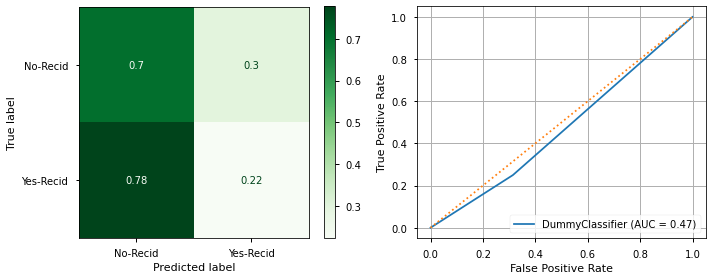

In [74]:
from sklearn.dummy import DummyClassifier

dummy= DummyClassifier(strategy='stratified')
dummy.fit(X_train_tf,y_train)
ji.evaluate_classification(dummy,X_test_tf,y_test,
                       label='Dummy Classifier')

- Our Dummy Classifier performed terribly, as it should. The imbalanced nature of the classes is very apparently in the recall values for 0 and 1 

## Random Forests

### RF #1: Vanilla RandomForest (Imbalanced Data)

------------------------------------------------------------
	CLASSIFICATION REPORT - Vanilla Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

    No-Recid       0.77      0.85      0.81       178
   Yes-Recid       0.51      0.39      0.44        72

    accuracy                           0.72       250
   macro avg       0.64      0.62      0.63       250
weighted avg       0.70      0.72      0.70       250



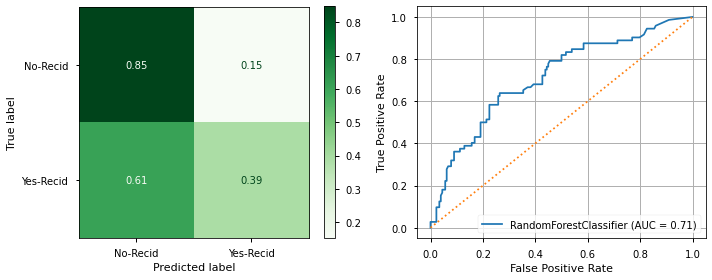

Training Score = 0.96
Test Score = 0.72


In [75]:
rf1 = RandomForestClassifier(random_state=SEED)
rf1.fit(X_train_tf,y_train)


ji.evaluate_classification(rf1,X_test_tf,y_test,X_train=X_train_tf,
                           y_train=y_train,label="Vanilla Random Forest")


### RF #2 - `class_weight="balanced"`

------------------------------------------------------------
	CLASSIFICATION REPORT - Random Forest (class_weight='balanced')
------------------------------------------------------------
              precision    recall  f1-score   support

    No-Recid       0.79      0.86      0.82       178
   Yes-Recid       0.55      0.43      0.48        72

    accuracy                           0.74       250
   macro avg       0.67      0.65      0.65       250
weighted avg       0.72      0.74      0.73       250



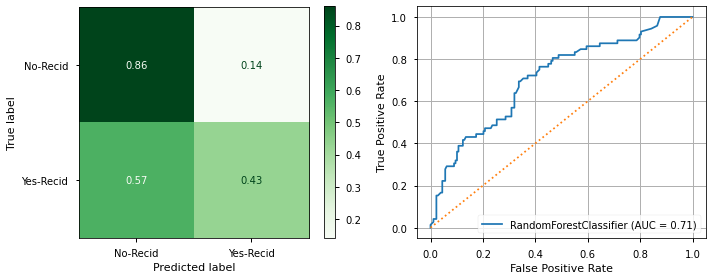

Training Score = 0.96
Test Score = 0.74


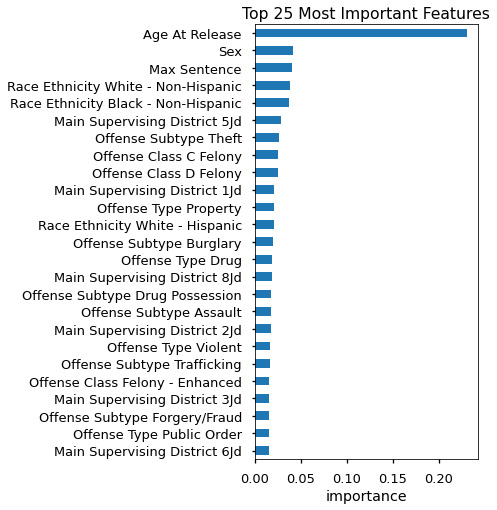

In [76]:
rf2 = RandomForestClassifier(class_weight='balanced',random_state=SEED)
rf2.fit(X_train_tf,y_train)
ji.evaluate_classification(rf2,X_test_tf,y_test,X_train=X_train_tf,y_train=y_train,
                           label= "Random Forest (class_weight='balanced')")
plot_importance(rf2,X_test_tf)

In [77]:
# rf3 = RandomForestClassifier(class_weight='balanced_subsample',random_state=SEED)
# rf3.fit(X_train_tf,y_train)
# ji.evaluate_classification(rf3,X_test_tf,y_test,X_train=X_train_tf,y_train=y_train,
#                            label= "Random Forest (class_weight='balanced')")
# plot_importance(rf3,X_test_tf)

### RF- Pipe

------------------------------------------------------------
	CLASSIFICATION REPORT - Vanilla Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

    No-Recid       0.79      0.86      0.82       178
   Yes-Recid       0.55      0.43      0.48        72

    accuracy                           0.74       250
   macro avg       0.67      0.65      0.65       250
weighted avg       0.72      0.74      0.73       250



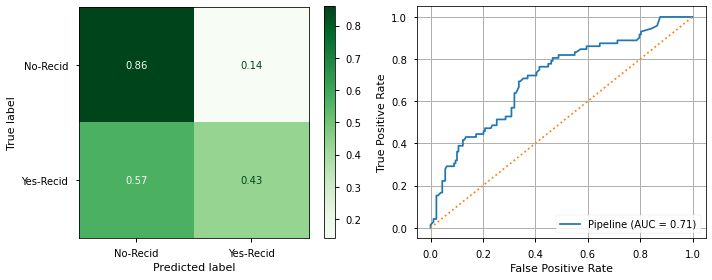

Training Score = 0.96
Test Score = 0.74


In [78]:
## Making a Pipeline/GridSearch to confirm if scaling makes a diff
rf_pipe = Pipeline(steps=[
    ('scaler',StandardScaler()), 
    ('clf',RandomForestClassifier(random_state=SEED, class_weight='balanced'))
     ])
rf_pipe.fit(X_train_tf,y_train)


ji.evaluate_classification(rf_pipe,X_test_tf,y_test,X_train=X_train_tf,
                           y_train=y_train,label="Vanilla Random Forest")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.2s finished


{'clf__class_weight': 'balanced_subsample', 'scaler': 'passthrough'}
------------------------------------------------------------
	CLASSIFICATION REPORT - GridSearch Best Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

    No-Recid       0.78      0.84      0.81       178
   Yes-Recid       0.50      0.40      0.45        72

    accuracy                           0.71       250
   macro avg       0.64      0.62      0.63       250
weighted avg       0.70      0.71      0.70       250



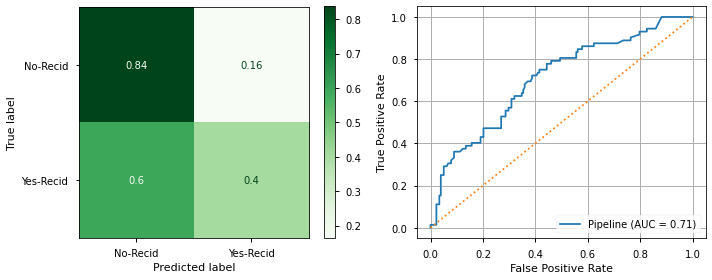

Training Score = 0.96
Test Score = 0.71


In [79]:
## Gridsearch for scaling and class_weight

params = {'scaler':['passthrough',StandardScaler(),MinMaxScaler(),RobustScaler()],
         'clf__class_weight':[None, 'balanced','balanced_subsample']}
grid = GridSearchCV(rf_pipe, params, verbose=True,n_jobs=-1,scoring='f1')

grid.fit(X_train_tf,y_train)
print(grid.best_params_)
ji.evaluate_classification(grid.best_estimator_,X_test_tf,y_test,
                           X_train=X_train_tf, y_train=y_train,
                           label="GridSearch Best Random Forest")

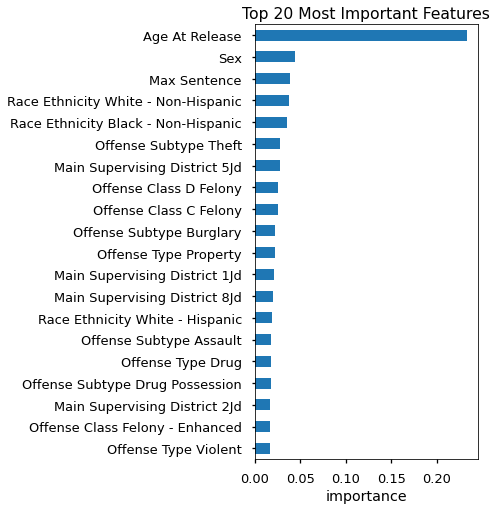

In [80]:
plot_importance(grid.best_estimator_.named_steps['clf'], X_test_tf,n=20)

- Regardless of which parameter for class_weight, the class imbalance is heavily skewing the models' predictions towards non-recidivist.
- We will use SMOTE to oversampling our minority class in the training set. 

## SMOTENC for Class Imbalance

- Since our dataset contains categorical features, we must use the SMOTENC class from imblearn, instead of the normal SMOTE class. 
- This class requires an index of categorical features and handles them differently than numeric features.

In [81]:
from imblearn.over_sampling import SMOTENC

In [82]:
## Getting cat features index
cat_col_index = [False for col in num_cols]
cat_col_index.extend([True for col in binary_cols])

cat_col_index.extend([True for col in cat_features])
X_train_tf.columns[cat_col_index]

Index(['sex', 'target_population', 'felony', 'main_supervising_district_1JD',
       'main_supervising_district_2JD', 'main_supervising_district_3JD',
       'main_supervising_district_4JD', 'main_supervising_district_5JD',
       'main_supervising_district_6JD', 'main_supervising_district_7JD',
       'main_supervising_district_8JD', 'main_supervising_district_MISSING',
       'release_type_Discharged – End of Sentence', 'release_type_MISSING',
       'release_type_Parole', 'release_type_Special Sentence',
       'race_ethnicity_American Indian or Alaska Native - Hispanic',
       'race_ethnicity_American Indian or Alaska Native - Non-Hispanic',
       'race_ethnicity_Asian or Pacific Islander - Non-Hispanic',
       'race_ethnicity_Black - Non-Hispanic',
       'race_ethnicity_White - Hispanic',
       'race_ethnicity_White - Non-Hispanic',
       'offense_class_Aggravated Misdemeanor', 'offense_class_B Felony',
       'offense_class_C Felony', 'offense_class_D Felony',
       'offen

### 🎛SMOTENC params

### RF #3: RandomForest with SMOTE'd Data

------------------------------------------------------------
	CLASSIFICATION REPORT - RandomForest - SMOTE
------------------------------------------------------------
              precision    recall  f1-score   support

    No-Recid       0.81      0.84      0.83       178
   Yes-Recid       0.57      0.51      0.54        72

    accuracy                           0.75       250
   macro avg       0.69      0.68      0.68       250
weighted avg       0.74      0.75      0.74       250



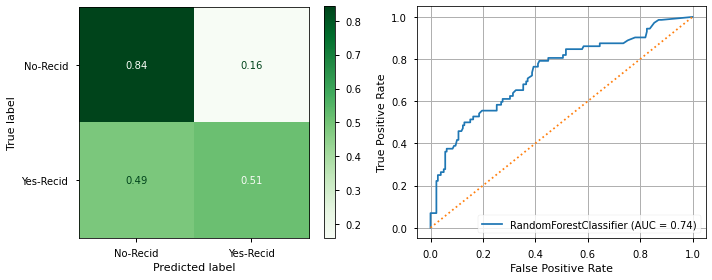

Training Score = 0.96
Test Score = 0.75


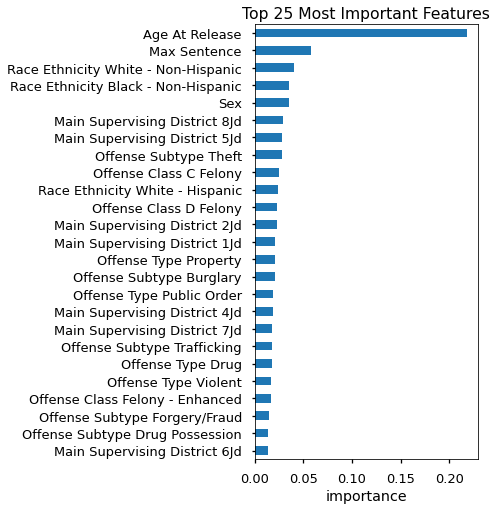

In [83]:
# SMOTE_SEED = 432


smote = SMOTENC(cat_col_index,random_state=SMOTE_SEED,
                k_neighbors=5, n_jobs=-1)

X_train_smote,y_train_smote = smote.fit_resample(X_train_tf,y_train)
y_train_smote.value_counts()
### SPLIT HERE ###
rf3 = RandomForestClassifier()#random_state=SEED)#class_weight='balanced')
rf3.fit(X_train_smote,y_train_smote)
ji.evaluate_classification(rf3,X_test_tf,y_test,
                           X_train=X_train_smote,
                           y_train=y_train_smote,
                           label='RandomForest - SMOTE')
plot_importance(rf3,X_test_tf)

- Resampling with SMOTE has improved our model's ability to predict the target class (recall went from 0.4 - 0.5), but overall the model is still lacking and accuracy has decreased as well.

### RF GridSearch 

```python
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

clf = RandomForestClassifier()
params ={'max_depth':[None,5,7,10,20,30,],
         'min_samples_leaf':[1,2,3],
         'criterion':['gini','entropy'],        
        }


grid = GridSearchCV(clf,params,scoring='recall_macro', n_jobs=-1)

grid.fit(X_train_smote,y_train_smote)
print(grid.best_params_)

print(grid.best_score_)
evaluate_classification(grid.best_estimator_,X_test_tf,y_test)
```

<AxesSubplot:ylabel='Count'>

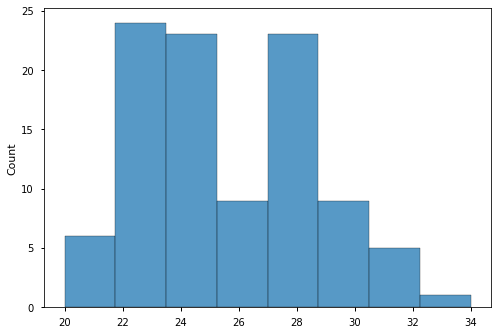

In [84]:
## Checking depths of trees in the forest
depths = [tree.get_depth() for tree in rf3.estimators_]
sns.histplot(depths)

In [85]:
rf_pipe = Pipeline(steps=[
    ('scaler',StandardScaler()), 
    ('clf',RandomForestClassifier(class_weight='balanced'))
     ])

params ={'scaler':['passthrough',StandardScaler(),MinMaxScaler()],
         'clf__class_weight':[None,'balanced','balanced_subsample'],
         'clf__max_depth':[None,15,20,25,30],
         'clf__min_samples_leaf':[1,2,3],
#          'clf__min_samples_split':[2,3],
         'clf__criterion':['gini','entropy'], 
         'clf__n_estimators':[50,100,150]
        }

grid = GridSearchCV(rf_pipe, params, verbose=True,
                    n_jobs=-1,cv=3,scoring='recall_macro')

grid.fit(X_train_tf,y_train)

Fitting 3 folds for each of 810 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 750 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 1100 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 1550 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 2100 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  1.5min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        RandomForestClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'clf__class_weight': [None, 'balanced',
                                               'balanced_subsample'],
                         'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [None, 15, 20, 25, 30],
                         'clf__min_samples_leaf': [1, 2, 3],
                         'clf__n_estimators': [50, 100, 150],
                         'scaler': ['passthrough', StandardScaler(),
                                    MinMaxScaler()]},
             scoring='recall_macro', verbose=True)

{'clf__class_weight': 'balanced', 'clf__criterion': 'entropy', 'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 50, 'scaler': StandardScaler()}
0.621863538640317
------------------------------------------------------------
	CLASSIFICATION REPORT - Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

    No-Recid       0.78      0.79      0.78       178
   Yes-Recid       0.46      0.44      0.45        72

    accuracy                           0.69       250
   macro avg       0.62      0.62      0.62       250
weighted avg       0.69      0.69      0.69       250



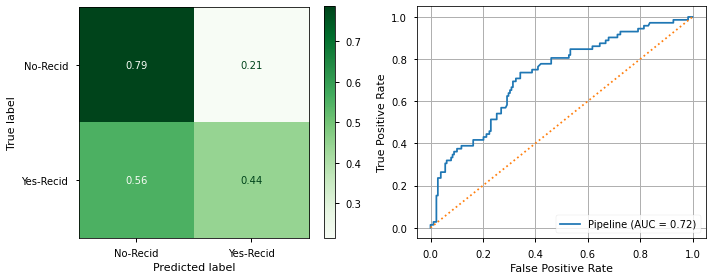

Training Score = 0.95
Test Score = 0.69


In [86]:
print(grid.best_params_)
print(grid.best_score_)
ji.evaluate_classification(grid.best_estimator_,X_test_tf,y_test,
                           X_train=X_train_tf,y_train=y_train)

### Random Forest Observations/Summary

- Random Forests seem to have a hard time learning about the minority class- Return-to_prison = Yes

# MODELING- Part 2

- Finally, we will try 2 final model types, Support Vector Classifier and Logistic Regression.
- Both of these models require scaled data for correct performance. 

## Preprocessing Scaled for SVC and LogReg

### Scaling `X_train_tf` & `X_test_tf`

In [105]:
## Minmax Scaling for Faster Convergence of Gradient Descent 
scaler = StandardScaler()
X_train_reg = pd.DataFrame(scaler.fit_transform(X_train_tf),
                           columns=X_train_tf.columns, index=X_train_tf.index)
X_test_reg = pd.DataFrame(scaler.transform(X_test_tf),
                          columns=X_train_tf.columns, index=X_test_tf.index)
X_train_reg.describe()

,age_at_release,max_sentence,sex,target_population,felony,main_supervising_district_1JD,main_supervising_district_2JD,main_supervising_district_3JD,main_supervising_district_4JD,main_supervising_district_5JD,main_supervising_district_6JD,main_supervising_district_7JD,main_supervising_district_8JD,main_supervising_district_MISSING,release_type_Discharged – End of Sentence,release_type_MISSING,release_type_Parole,release_type_Special Sentence,race_ethnicity_American Indian or Alaska Native - Hispanic,race_ethnicity_American Indian or Alaska Native - Non-Hispanic,race_ethnicity_Asian or Pacific Islander - Non-Hispanic,race_ethnicity_Black - Non-Hispanic,race_ethnicity_White - Hispanic,race_ethnicity_White - Non-Hispanic,offense_class_Aggravated Misdemeanor,offense_class_B Felony,offense_class_C Felony,offense_class_D Felony,offense_class_Felony - Enhanced,offense_class_Other Felony,offense_class_Serious Misdemeanor,offense_class_Sex Offender,offense_type_Drug,offense_type_Other,offense_type_Property,offense_type_Public Order,offense_type_Violent,offense_subtype_Alcohol,offense_subtype_Arson,offense_subtype_Assault,offense_subtype_Burglary,offense_subtype_Drug Possession,offense_subtype_Flight/Escape,offense_subtype_Forgery/Fraud,offense_subtype_Kidnap,offense_subtype_Murder/Manslaughter,offense_subtype_OWI,offense_subtype_Other Criminal,offense_subtype_Other Drug,offense_subtype_Other Violent,offense_subtype_Prostitution/Pimping,offense_subtype_Robbery,offense_subtype_Sex,offense_subtype_Sex Offender Registry/Residency,offense_subtype_Special Sentence Revocation,offense_subtype_Theft,offense_subtype_Traffic,offense_subtype_Trafficking,offense_subtype_Vandalism,offense_subtype_Weapons
count,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00,750.00
mean,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.35,-1.21,-3.07,-1.10,-2.28,-0.31,-0.26,-0.19,-0.19,-0.43,-0.21,-0.26,-0.28,-0.91,-0.91,-0.04,-1.07,-0.12,-0.04,-0.10,-0.07,-0.54,-0.28,-1.47,-0.42,-0.26,-0.62,-0.86,-0.26,-0.05,-0.09,-0.04,-0.68,-0.12,-0.71,-0.37,-0.53,-0.12,-0.12,-0.36,-0.32,-0.18,-0.05,-0.25,-0.04,-0.13,-0.23,-0.10,-0.16,-0.15,-0.04,-0.09,-0.25,-0.14,-0.04,-0.43,-0.16,-0.59,-0.12,-0.10
25%,-0.54,-0.47,0.33,-1.10,0.44,-0.31,-0.26,-0.19,-0.19,-0.43,-0.21,-0.26,-0.28,-0.91,-0.91,-0.04,-1.07,-0.12,-0.04,-0.10,-0.07,-0.54,-0.28,-1.47,-0.42,-0.26,-0.62,-0.86,-0.26,-0.05,-0.09,-0.04,-0.68,-0.12,-0.71,-0.37,-0.53,-0.12,-0.12,-0.36,-0.32,-0.18,-0.05,-0.25,-0.04,-0.13,-0.23,-0.10,-0.16,-0.15,-0.04,-0.09,-0.25,-0.14,-0.04,-0.43,-0.16,-0.59,-0.12,-0.10
50%,-0.13,-0.47,0.33,0.91,0.44,-0.31,-0.26,-0.19,-0.19,-0.43,-0.21,-0.26,-0.28,-0.91,-0.91,-0.04,0.93,-0.12,-0.04,-0.10,-0.07,-0.54,-0.28,0.68,-0.42,-0.26,-0.62,-0.86,-0.26,-0.05,-0.09,-0.04,-0.68,-0.12,-0.71,-0.37,-0.53,-0.12,-0.12,-0.36,-0.32,-0.18,-0.05,-0.25,-0.04,-0.13,-0.23,-0.10,-0.16,-0.15,-0.04,-0.09,-0.25,-0.14,-0.04,-0.43,-0.16,-0.59,-0.12,-0.10
75%,0.27,0.46,0.33,0.91,0.44,-0.31,-0.26,-0.19,-0.19,-0.43,-0.21,-0.26,-0.28,1.10,1.10,-0.04,0.93,-0.12,-0.04,-0.10,-0.07,-0.54,-0.28,0.68,-0.42,

### Resampling `X_train_reg`

In [106]:
## Getting cat features index
cat_col_index = [False for col in num_cols]
cat_col_index.extend([True for col in binary_cols])

cat_col_index.extend([True for col in cat_features])

smote = SMOTENC(cat_col_index, n_jobs=-1,random_state=SMOTE_SEED)

X_train_reg_smote,y_train_reg_smote = smote.fit_resample(X_train_reg,y_train)
y_train_reg_smote.value_counts()

0    532
1    532
Name: return_to_prison, dtype: int64

## XGBoost

- [Parameter tuning for xgboost](https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html)

In [107]:
from xgboost import XGBRFClassifier,XGBClassifier

### XGBoost Classifier

------------------------------------------------------------
	CLASSIFICATION REPORT - XGBoost Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

    No-Recid       0.82      0.72      0.77       178
   Yes-Recid       0.47      0.61      0.53        72

    accuracy                           0.69       250
   macro avg       0.64      0.67      0.65       250
weighted avg       0.72      0.69      0.70       250



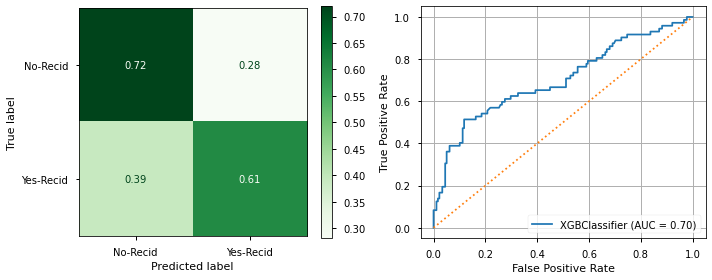

Training Score = 0.91
Test Score = 0.69


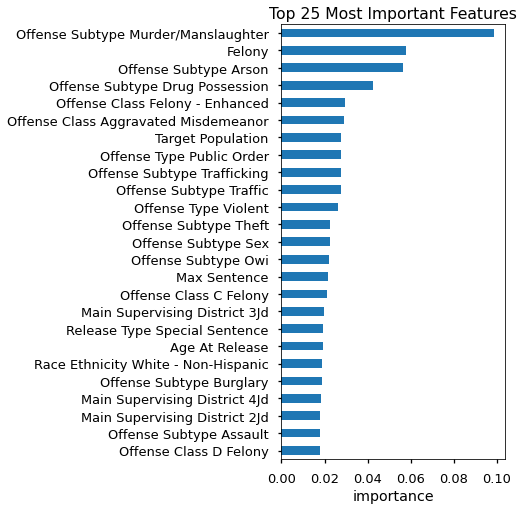

In [108]:
xclf = XGBClassifier(objective='binary:logistic',
                    learning_rate=0.5,#early_stopping=4,
                    use_label_encoder=False,random_state=SEED,
                    scale_pos_weight=4,
                    verbosity=0,#min_child_weight=0.8,
                    max_depth=6)

xclf.fit(X_train_reg,y_train,verbose=False)#,#eval_metric='error',
#         eval_set=[(X_train_tf,y_train),(X_test_tf, y_test)])

ji.evaluate_classification(xclf,X_test_reg,y_test,
                           X_train=X_train_reg,y_train=y_train,
                           label='XGBoost Random Forest');
# plt.show()
plot_importance(xclf,X_test_tf)

### XGBoost RF Classifier

#### Smoted Data

------------------------------------------------------------
	CLASSIFICATION REPORT - XGBoost Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

    No-Recid       0.83      0.60      0.70       178
   Yes-Recid       0.41      0.71      0.52        72

    accuracy                           0.63       250
   macro avg       0.62      0.65      0.61       250
weighted avg       0.71      0.63      0.65       250



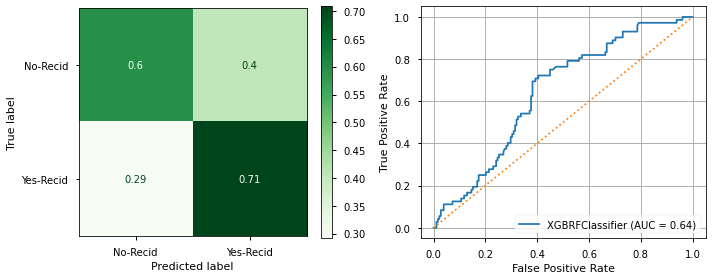

Training Score = 0.71
Test Score = 0.63


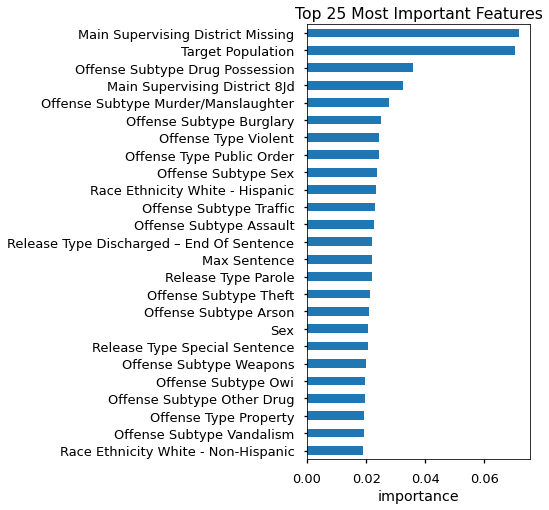

In [109]:
xrf_clf = XGBRFClassifier(learning_rate=0.4,use_label_encoder=False,
                      objective='binary:logistic',early_stopping=3,
                      scale_pos_weight=2.4,
                      max_depth=6)#class_weight='balanced')
xrf_clf.fit(X_train_reg,y_train)

ji.evaluate_classification(xrf_clf,X_test_reg,y_test,
                           X_train=X_train_reg,y_train=y_train,
                           label='XGBoost Random Forest');
# plt.show()
plot_importance(xrf_clf,X_test_tf)

## LogisticRegression

------------------------------------------------------------
	CLASSIFICATION REPORT - Logistic Regression - class_weight="balanced" - C=1e12
------------------------------------------------------------
              precision    recall  f1-score   support

    No-Recid       0.78      0.54      0.64       178
   Yes-Recid       0.35      0.61      0.45        72

    accuracy                           0.56       250
   macro avg       0.56      0.58      0.54       250
weighted avg       0.65      0.56      0.58       250



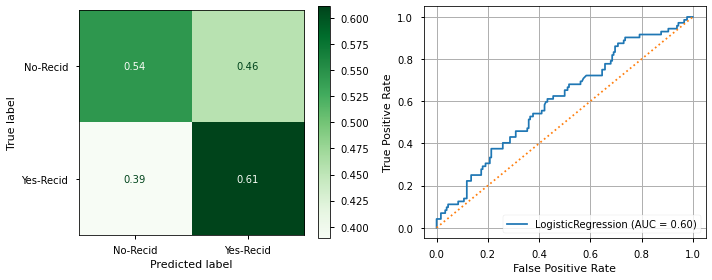

Training Score = 0.60
Test Score = 0.56


In [119]:
logreg= LogisticRegression(class_weight='balanced',C=1e12)

logreg.fit(X_train_reg,y_train)
ji.evaluate_classification(logreg,X_test_reg,y_test,  
                           X_train=X_train_reg,y_train=y_train,
                           label='Logistic Regression - class_weight="balanced" - C=1e12')

In [117]:
# def get_coeffs(logregCV, X_train_smote,):
#     coeffs = pd.Series(logregCV.coef_[0],index=X_train_smote.columns)
#     coeffs['Intercept'] = logregCV.intercept_
#     coeffs = coeffs.astype(float)
#     return coeffs

# coeffs = get_coeffs(logregCV,X_train_smote)
# coeffs.sort_values().plot(kind='barh',figsize=(5,10))

### LogRegCV

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


best C= [21.5443469]
------------------------------------------------------------
	CLASSIFICATION REPORT - Logistic Regression CV
------------------------------------------------------------
              precision    recall  f1-score   support

    No-Recid       0.72      0.78      0.75       178
   Yes-Recid       0.32      0.25      0.28        72

    accuracy                           0.63       250
   macro avg       0.52      0.52      0.51       250
weighted avg       0.60      0.63      0.61       250



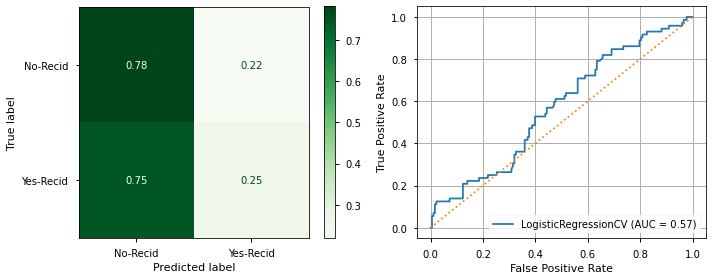

Training Score = 0.73
Test Score = 0.52


In [127]:
logregCV = LogisticRegressionCV( scoring='recall_macro',n_jobs=-1,verbose=True)#,penalty='l1',cv=3,
#                                 solver='liblinear',max_iter=250,n_jobs=-1)

logregCV.fit(X_train_reg_smote,y_train_reg_smote)
print(f"best C= {logregCV.C_}")

ji.evaluate_classification(logregCV,X_test_reg,y_test,  
                           X_train=X_train_reg_smote,y_train=y_train_reg_smote,
                           label='Logistic Regression CV')

## SVC

```python
from sklearn.svm import LinearSVC,SVC
clf = SVC(kernel='rbf',max_iter=5000,class_weight='balanced')
clf.fit(X_train_reg,y_train)

ji.evaluate_classification(clf,X_test_reg,y_test,
                           X_train=X_train_reg,y_train=y_train,
                           label='LinearSVC');
```

In [128]:
from sklearn.svm import LinearSVC,SVC

[LibSVM]------------------------------------------------------------
	CLASSIFICATION REPORT - SVC
------------------------------------------------------------
              precision    recall  f1-score   support

    No-Recid       0.74      0.83      0.78       178
   Yes-Recid       0.39      0.28      0.33        72

    accuracy                           0.67       250
   macro avg       0.57      0.55      0.55       250
weighted avg       0.64      0.67      0.65       250



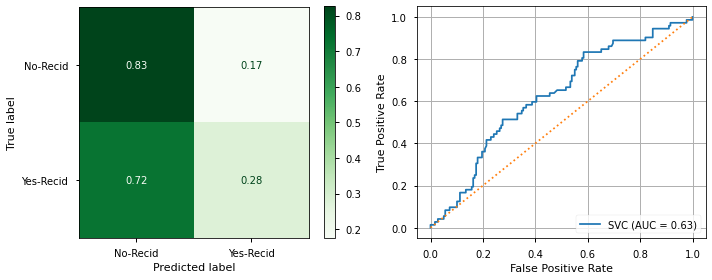

Training Score = 0.82
Test Score = 0.67


In [129]:
## smoted data
clf = SVC(kernel='rbf',max_iter=5000,verbose=True)#,class_weight='balanced')
clf.fit(X_train_reg_smote,y_train_reg_smote)

ji.evaluate_classification(clf,X_test_reg,y_test,
                           X_train=X_train_reg_smote,y_train=y_train_reg_smote,
                           label='SVC');
# plt.show()

[LibSVM]------------------------------------------------------------
	CLASSIFICATION REPORT - SVC
------------------------------------------------------------
              precision    recall  f1-score   support

    No-Recid       0.77      0.63      0.70       178
   Yes-Recid       0.37      0.53      0.43        72

    accuracy                           0.60       250
   macro avg       0.57      0.58      0.56       250
weighted avg       0.65      0.60      0.62       250



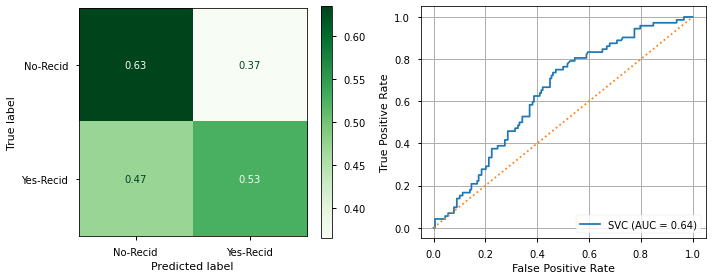

Training Score = 0.71
Test Score = 0.60


In [130]:
clf = SVC(kernel='rbf',max_iter=5000,verbose=True,class_weight='balanced')
clf.fit(X_train_reg,y_train)

ji.evaluate_classification(clf,X_test_reg,y_test,
                           X_train=X_train_reg,y_train=y_train,
                           label='SVC');
# plt.show()

Fitting 3 folds for each of 308 candidates, totalling 924 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 924 out of 924 | elapsed:    2.7s finished
Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


[LibSVM]{'C': 1000000000000.0, 'class_weight': 'balanced', 'gamma': 'scale'}
------------------------------------------------------------
	CLASSIFICATION REPORT - SVC
------------------------------------------------------------
              precision    recall  f1-score   support

    No-Recid       0.76      0.65      0.70       178
   Yes-Recid       0.36      0.49      0.41        72

    accuracy                           0.60       250
   macro avg       0.56      0.57      0.56       250
weighted avg       0.64      0.60      0.62       250



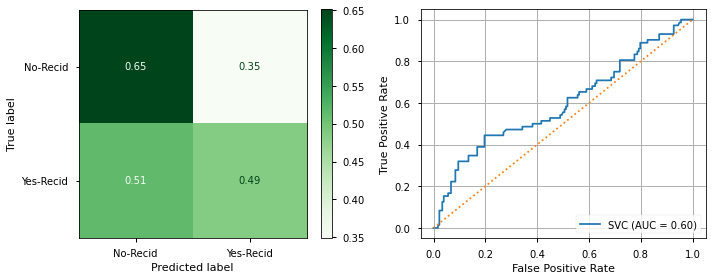

Training Score = 0.80
Test Score = 0.60


In [131]:
## SVC GridSearch
clf = SVC(kernel='rbf',max_iter=10000,verbose=True,class_weight='balanced')


params = {'C':[0.01,0.1,1.,10,100,1e6,1e12],
          'gamma':['scale','auto',*np.linspace(0.00,1,20)],
          'class_weight':['balanced','balanced_subsample'],
#           'shrinking':[True,False]
         }

grid = GridSearchCV(clf,params,scoring='recall_macro', cv=3,
                    n_jobs=-1,verbose=True)
grid.fit(X_train_reg,y_train)
print(grid.best_params_)
ji.evaluate_classification(grid.best_estimator_,X_test_reg,y_test,
                           X_train=X_train_reg,y_train=y_train,
                           label='SVC');
# plt.show()

# INTERPRETATION

## Best Model

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, early_stopping=3, gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=0.4, max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=12, num_parallel_tree=100,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=2.4, tree_method='exact',
                use_label_encoder=False, validate_parameters=1, verbosity=None)

------------------------------------------------------------
	CLASSIFICATION REPORT - XGBoost Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

    No-Recid       0.83      0.60      0.70       178
   Yes-Recid       0.41      0.71      0.52        72

    accuracy                           0.63       250
   macro avg       0.62      0.65      0.61       250
weighted avg       0.71      0.63      0.65       250



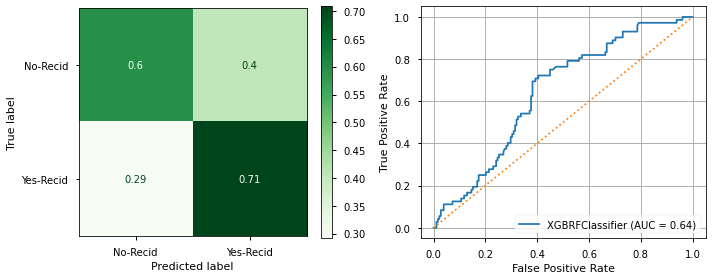

Training Score = 0.71
Test Score = 0.63


In [138]:
best_model = clone(xrf_clf)
best_model.fit(X_train_reg,y_train)
display(best_model)
ji.evaluate_classification(best_model,X_test_reg,y_test,
                           X_train=X_train_reg,y_train=y_train,
                           label='XGBoost Random Forest');


In [145]:
## Save best model?

save = input('Should the above model be saved and overwrite the old best model? (Y/N)')

if save.lower()=='y':
    folder = "./models/"
    os.makedirs(folder,exist_ok=True)
    fname = f"{folder}best_model.joblib"
    joblib.dump(best_model,fname,compress=3)
    print('Success: best_model saved as {fname}.')
else:
    print('Skipping saving model as joblib file.')

Should the above model be saved and overwrite the old best model? (Y/N)y
Success: best_model saved as {fname}.


- While none of the models performed particularly well, according to recall and accuracy, the XGboost random forest that was trained with scaled, but NOT smote'd data, was the best model.

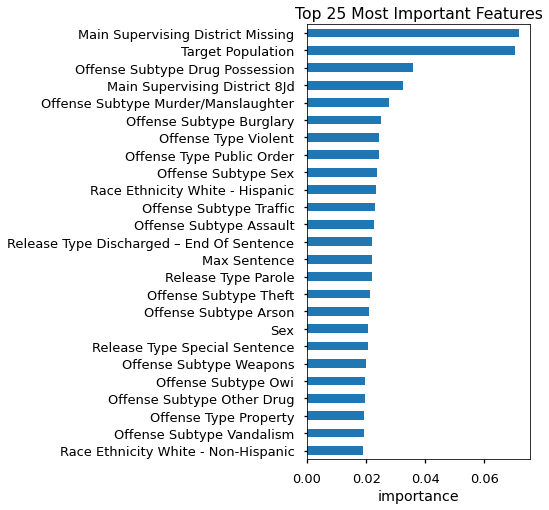

In [150]:
plot_importance(best_model,X_train_reg)
fig = plt.gcf()
fig.savefig('images/best_model_importances.png')

### Using SHAP and Shapely Values for Model Interpretation



- Uses game theory to test different combinations of features and how a particular feature steers the model's predictions by removing each feature and seeing the effect on the error.
- Critically, these shapely values explain not only which features were important but the relationship between the values of the feature with the target

#### Shap Resources

- We will use the SHAP package's `TreeExplainer` with our best model to gain a new perspective of feature importance. 

- White Paper on Shapely Values:
    - https://arxiv.org/abs/1705.07874
    
- Blog Posts:
    - https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

    - https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a


- Videos/Talks:
    - ["Open the Black Box: an intro to Model Interpretability with LIME and SHAP](https://youtu.be/C80SQe16Rao)
    
<!-- 
**`shap.dependence_plot`**
```python
## To Auto-Select Feature Most correlated with a specific feature, just pass the desired feature's column name.

shap.dependence_plot('super_dist', shap_values, X_train)

## There is a way to specifically call out multiple features but I wasn't able to summarize it quickly for this nb
```

`shap.force_plot`

To show an individual data point's prediction and the factors pushing it towards one class or another

```python
## Just using np to randomly select a row

row = np.random.choice(range(len(X_train))
                       
shap.force_plot(explainer.expected_value, shap_values[row,:], X_train.iloc[row,:])
``` -->

In [160]:
import shap 
shap.initjs()
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_reg,y_test)
shap_values.shape

(250, 60)

### Comparing Feature Importances

#### Summary Plot

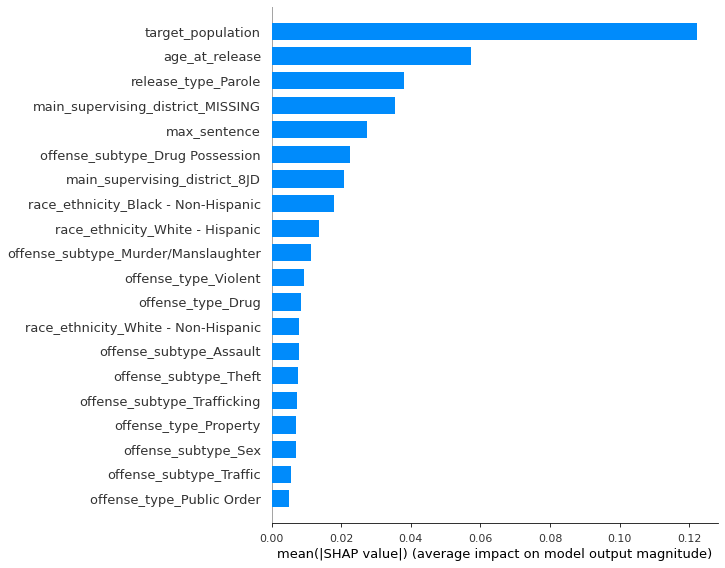

In [167]:
## Shap-calculated Feature Importances
shap.summary_plot(shap_values,X_train_reg,plot_type='bar')

- The summary plot, when shown in bar-mode, looks very similar to traditional feature importances from a scikit-learn tree-based model. 
We do not get any additional information about the relationship of the values of each feature to the target.
However, the feature rankings calcualted via  SHAP are not guaranteed to match the random forest feature importances. 

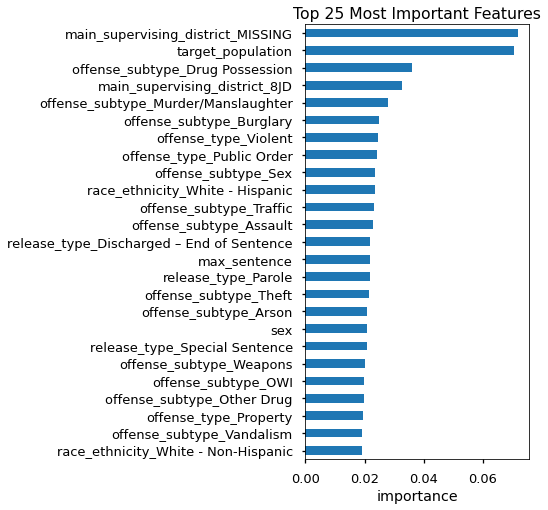

In [175]:
## Built-In Random Forest Importances
plot_importance(best_model,X_test_tf,clean_names=False)

### Most Important Features

#### Top Features - XGBoost RF Importances
>- According to the inherent importances from our best model, the following are the 5 most important features for predicting recidivists.
    1. main_supervising_district_MISSING
    2. target_population
    3. offense_subtype_Drug Possession
    4. main_supervising_district_8JD
    5. offense_subtype_Murder/Manslaughter
- The remaining top features are various crime offense subtypes, race/ethnicities, and release types.

#### Top Features - SHAP Feature Importances

>- According to the Shapely values calculated by the SHAP package, the following 5 features and
    1. target_population
    2. age_at_release
    3. release_type_Parole
    4. main_supervising_district_MISSING
    5. max-sentence
    
- The remaining top features are various crime offense subtypes, race/ethnicities. 
- Interesting, no release types appear in the top features, unlike our xgboost-identified features. 

### Shap Detailed Summary Plot of Importances



**`shap.summary_plot`**
> - Feature importance: Variables are ranked in descending order.
- Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
- Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.


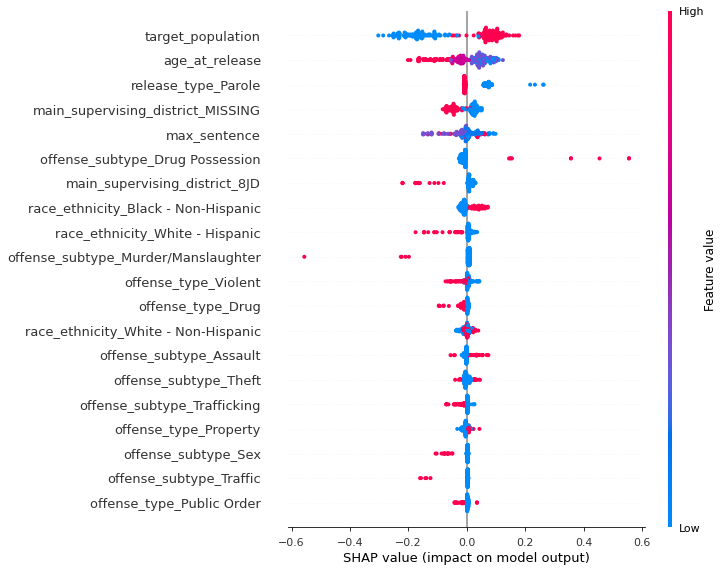

In [163]:
shap.summary_plot(shap_values, X_test_reg)

#### Relationship Between Top Features  & the Target

>- According to the Shapely values calculated by the SHAP package, the following 5 features had the following relationships with the target:
    1. `target_population`: 
        - Being part of the target_population, which was a group of prisoners already receiving additional interventions to prevent recidivism, actually makes the prisoner MORE likely to return to crime. 
        - While one could interpret this as the state's interventions not being effective, I suggest we instead use this to affirm that the state was correctly targeting at-risk prisoners already, at least partially. 
    2. `age_at_release`:
        - Unsurprisingly, the younger the prisoner is when released, the more likely they are to return to crime. 
        - This makes sense in a few ways. For one, the younger they are they less likely they are to be well-established in life and financially stable. 
    3. `release_type_Parole`:
        - Being released on Parole makes a prisoner less likely to return to crime. 
        - This makes sense, as parolees are monitored regularly by their parole officers, which would 
    4. `main_supervising_district_MISSING`:
        - Prisoners who were missing a supervising judicial district were LESS likely to return to crime. 
        - Future work: investigate which prisoners are assigned supervising judicial districts and which ones are not. 
        - There could be a logical reason that the prisoner may not need a supervising district, either due to the nature of their crime or release. Further investigation is warranted.
    5. `max-sentence`:
        - Max sentence has a more complicated relationship to the target. 
        - It seems that the criminals in prison for the  shortest-sentence crimes and the longest-sentence crimes seem to be more likely to return to crime.
        - Crimes that fall in the middle of the range of # of years tend to be less likely to return to crime.
    
<!-- - The remaining top features are various crime offense subtypes, race/ethnicities. 

- The 6th feature also is an interesting observation, as those who were in prison for Drug Offenses are more likely to return to crime. 
    - This is not surprising, as the war on drugs has disproportionately occupied US prisons with non-violent criminals. It is not surprisining these same individuals were caught  -->

**`shap.dependence_plot`**

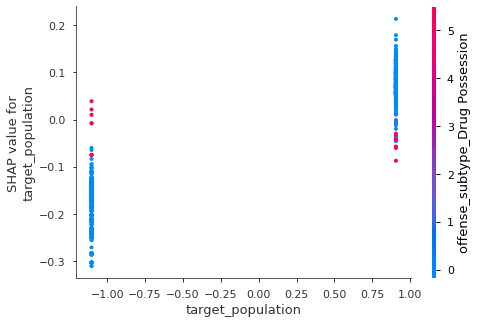

In [159]:
shap.dependence_plot('target_population', shap_values, X_train_reg)

# CONCLUSIONS

    
## Recommendations
- This model could be used to predict which prisoners due for release may at the greatest risk for recidivism.<br><br>
    - Using this knowledge, the state of Iowa could put new programs into action that target those at high risk for recidivism and provide additional assistance and guidance following release.<br><br>
    - Additionally, there could be additional counseling or education _prior_ to release to supply the inmate with tools and options to avoid returning to a life of crime.
    
# FUTURE DIRECTIONS
- With more time and reliable performance, would perform cross-validation of our final model.<br><br>
- Additional visuals summarizing the underlying features effects on recidivism.<br><br>
- Adapting more available visualization tools to better display the underpinning of the model.
<br><br>
- Exploration of the predictability of crimes types committed by recidivists.

# APPENDIX

In [ ]:
raise Exception("Stop here!")

## Removed Models

### XGBoost Multi-Score GridSearch

In [ ]:
from tqdm.contrib import tenumerate

In [ ]:
clf = XGBRFClassifier(n_estimators=100)
params ={'learning_rate':[10,1,0.1,0.01,0.5],
         'n_estimators':[100,50,200,25],
         'subsample':[0.8,0.7,0.9,0.6,0.5],
        'reg_lambda' :[1e-05,1e-04,1e-02,.1,1,10]}


if RUN_SEARCHES:
    

    # scores =['recall','recall_macro','accuracy']

    GRIDS={}

    ## Build loop to make dict of grids for each score method
    scores =['f1','f1_macro','roc_auc','recall','recall_macro']#,'accuracy','precision']

    reports = {}
    for _,score in tenumerate(scores):
        line = '==='*30
        print(line)
        print(f'[i] Starting {score}',end='\n'+line+"\n")

        GRIDS[score] = GridSearchCV(clf,params,cv=3,
                                    scoring=score,
                                    verbose=True,
                                    n_jobs=-1)
        GRIDS[score].fit(X_train_reg_smote,y_train_reg_smote)

        print(f"\n[i] Best Params for scoring={score}:" )
        print(GRIDS[score].best_params_)
        print('\n\n')

        reports[score] = ji.evaluate_classification( 
            GRIDS[score].best_estimator_,
            X_test_reg,y_test,label=score, 
            X_train=X_train_reg_smote, y_train=y_train_reg_smote,return_report=True)
        print('\n\n')
        ## Adding best_params to reports
    #     reports[score]['best_params'] = GRIDS[score].best_params_

### XGBoost GridSearch - Imbalanced Data+scale_pos_weight

In [ ]:
from sklearn.utils import compute_class_weight
classes = np.unique(y_train)
weights= dict(zip(classes,compute_class_weight(class_weight='balanced',classes=classes,
                          y=y_train)))
weights

In [ ]:
clf = XGBRFClassifier(scale_pos_weight=2.3)#class_weight='balanced')
clf.fit(X_train_reg,y_train)

ji.evaluate_classification(clf,X_test_reg,y_test,
                           X_train=X_train_reg,y_train=y_train,
                           label='XGBoost Random Forest');
# plt.show()
plot_importance(clf,X_test_tf)

In [ ]:
clf = XGBRFClassifier(scale_pos_weight=2.3)#class_weight='balanced')
clf.fit(X_train_reg,y_train)

ji.evaluate_classification(clf,X_test_reg,y_test,
                           X_train=X_train_reg,y_train=y_train,
                           label='XGBoost Random Forest');
# plt.show()
plot_importance(clf,X_test_tf)

In [ ]:
# np.linspace(1.8,4.0,num=10)

In [ ]:

clf = XGBClassifier(scale_pos_rate=2.1,use_label_encoder=False)
params ={'learning_rate':[1,0.1,0.3,0.5],
         
#          'scale_pos_rate':np.linspace(1.8,4.0,num=10),
#          'n_estimators':[100,50,200,25],
         'max_depth':[4,5,6],
#          'subsample':[0.8,0.7,0.9,0.6,0.5],
#         'reg_lambda' :[1e-05,1e-04,1e-02,.1,1,10]
         'eval_'
        }


grid = GridSearchCV(clf, params, cv=3,scoring='recall_macro')
grid.fit(X_train_reg,y_train)


print(grid.best_params_)
print(grid.best_score_)
ji.evaluate_classification(grid.best_estimator_,X_test_reg,y_test,
                           X_train=X_train_reg,y_train=y_train)

### SVC Multi-Score GridSearch

In [ ]:
from tqdm.contrib import tenumerate


In [ ]:
clf = SVC(kernel='rbf',max_iter=10000,verbose=True,class_weight='balanced')

if RUN_SEARCHES:
    # scores =['recall','recall_macro','accuracy']

    GRIDS={}

    ## Build loop to make dict of grids for each score method
    scores =['f1','f1_macro','roc_auc','recall','recall_macro']#,'accuracy','precision']

    reports = {}
    for _,score in tenumerate(scores):
        line = '==='*30
        print(line)
        print(f'[i] Starting {score}',end='\n'+line+"\n")

        GRIDS[score] = GridSearchCV(clf,params,cv=3,
                                    scoring=score,
                                    verbose=True,
                                    n_jobs=-1)
        GRIDS[score].fit(X_train_smote,y_train_smote)

        print(f"\n[i] Best Params for scoring={score}:" )
        print(GRIDS[score].best_params_)
        print('\n\n')

        reports[score] = ji.evaluate_classification( 
            GRIDS[score].best_estimator_,
            X_test_tf,y_test,label=score, 
            X_train=X_train_smote, y_train=y_train_smote,return_report=True)
        print('\n\n')
        ## Adding best_params to reports
    #     reports[score]['best_params'] = GRIDS[score].best_params_

In [ ]:
# pd.concat(reports)

In [ ]:
if RUN_SEARCHES:
    dfs=[]
    for metric,result in reports.items():

        result['scoring_param'] = metric
        dfs.append(pd.DataFrame(result))

    RESULTS = pd.concat(dfs).reset_index().set_index(['scoring_param','index'])
    # RESULTS.drop('scoring param',inplace=True)
    RESULTS

### Catboost

In [ ]:
X_train_tf.astype(int)

In [ ]:
# Import catboost Pool to create training and testing pools
from catboost import Pool, CatBoostClassifier

train_pool =  Pool(data=X_train_tf.astype(int), label=y_train, cat_features=[int(i) for i in cat_col_index])
test_pool = Pool(data=X_test_tf.astype(int), label=y_test,  cat_features=[int(i) for i in cat_col_index])

In [ ]:
# Instantiating CatBoostClassifier 
cb_base = CatBoostClassifier(
    iterations=2000,#depth=12,
    boosting_type='Ordered',
    learning_rate=0.001,
    thread_count=-1,
    eval_metric='Recall',
    silent=True,
    allow_const_label=True
)#,|
cb_base.fit(X_train_reg_smote, y_train_reg_smote, plot=True, early_stopping_rounds=50)
cb_base.best_score_

ji.evaluate_classification(cb_base,X_test_reg,y_test, 
                          X_train=X_train_reg_smote,y_train=y_train_reg_smote)

In [ ]:
# Instantiating CatBoostClassifier 
cb_base = CatBoostClassifier(iterations=1000, depth=14,
                            boosting_type='Ordered',
                            learning_rate=0.03,
                            thread_count=-1,
                            eval_metric='AUC',
                             silent=True,
                            allow_const_label=True
)#,
cb_base.fit(X_train_reg_smote, y_train_reg_smote, plot=True, early_stopping_rounds=30)
cb_base.best_score_

ji.evaluate_classification(cb_base,X_test_reg,y_test, 
                          X_train=X_train_reg_smote,y_train=y_train_reg_smote)

In [ ]:
# Instantiating CatBoostClassifier 
cb_base = CatBoostClassifier(iterations=3000, depth=14,
                            boosting_type='Ordered',
                            learning_rate=0.01,
                            thread_count=-1,
                            eval_metric='AUC',
                             silent=True,
                            allow_const_label=True
)#,
cb_base.fit(X_train_reg_smote, y_train_reg_smote, plot=True, early_stopping_rounds=30)
cb_base.best_score_

ji.evaluate_classification(cb_base,X_test_reg,y_test, 
                          X_train=X_train_reg_smote,y_train=y_train_reg_smote)

In [ ]:
# Instantiating CatBoostClassifier 
#,
                        
cb_orig = CatBoostClassifier(iterations=3000, depth=4,
                            boosting_type='Ordered',
                            learning_rate=0.03,
                            thread_count=-1,
                            eval_metric='AUC',
                            allow_const_label=True,
                           silent=True)
cb_orig.fit(X_train_reg_smote, y_train_reg_smote, plot=True, early_stopping_rounds=30)
print(cb_orig.best_score_)

ji.evaluate_classification(cb_orig,X_test_reg,y_test, 
                          X_train=X_train_reg_smote,y_train=y_train_reg_smote)